# Porter Case Study

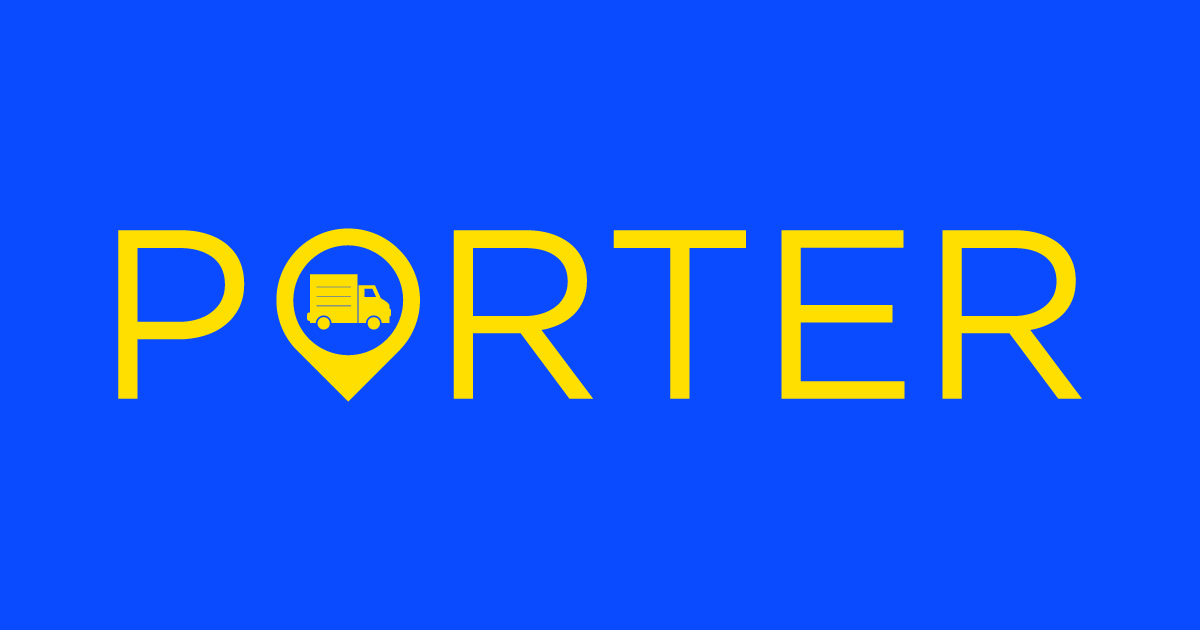

In [1]:
from  IPython.display import Image
Image(filename ="C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\porter_logo_d-2021-11-25-12_59_12.jpeg", width = 500)

                                      Important Library For Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from scipy.stats import zscore


Q.1. (a). the Problem Statement

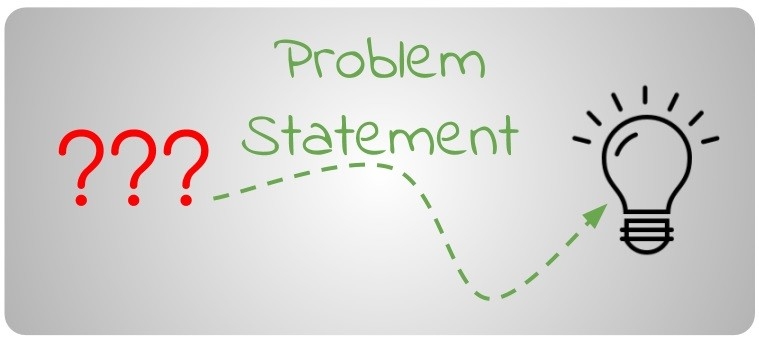

In [3]:
from IPython.display import Image
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\Problem_Statement.jpeg", width = 500)



Porter, India's largest marketplace for intra-city logistics, works with a wide range of 
restaurants to deliver their items directly to customers. The company wants to estimate the 
delivery time for each order based on various features, such as the items ordered, the restaurant, 
and the availability of delivery partners. An accurate estimation of delivery time will enhance 
customer satisfaction and optimize the delivery process.

# 1. Exploratory Data Analysis (EDA)

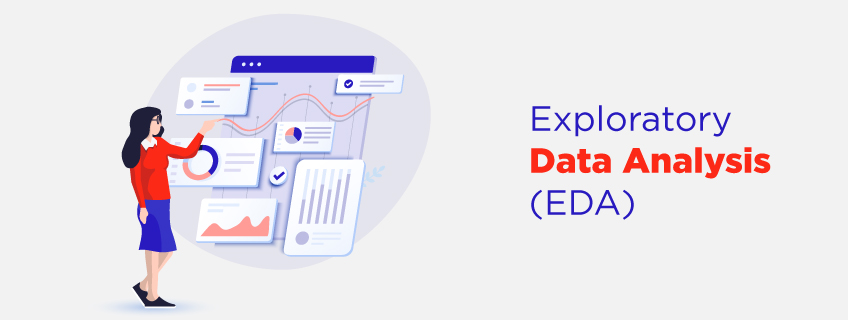

In [4]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\Eda.jpg", width = 500)

In [5]:
# Q.1(b). Importing Data 

df = pd.read_csv(r"C:\Users\Mustafa Hussain\Desktop\Placement Test\dataset.csv")
 

In [6]:
# top 5 rows 

df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
3  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
4  f0ade77b43923b38237db569b016ba25                    NaN             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                    33.0                 14.0                      21.0  
1                     1.0                  2.0                       2.0  
2                     1.0                  0.0                       0.0  
3                     1.0                  1.0                       2.0  
4                     6.0                  6.0                       9.0

In [7]:
# bottom 5 rows

df.tail()

market_id           created_at actual_delivery_time  \
197423        1.0  2015-02-17 00:19:41  2015-02-17 01:24:48   
197424        1.0  2015-02-13 00:01:59  2015-02-13 00:58:22   
197425        1.0  2015-01-24 04:46:08  2015-01-24 05:36:16   
197426        1.0  2015-02-01 18:18:15  2015-02-01 19:23:22   
197427        1.0  2015-02-08 19:24:33  2015-02-08 20:01:41   

                                store_id store_primary_category  \
197423  a914ecef9c12ffdb9bede64bb703d877                   fast   
197424  a914ecef9c12ffdb9bede64bb703d877                   fast   
197425  a914ecef9c12ffdb9bede64bb703d877                   fast   
197426  c81e155d85dae5430a8cee6f2242e82c               sandwich   
197427  c81e155d85dae5430a8cee6f2242e82c               sandwich   

        order_protocol  total_items  subtotal  num_distinct_items  \
197423             4.0            3      1389                   3   
197424             4.0            6      3010                   4   
197425             4.0            5      1836                   3   
197426             1.0            1      1175                   1   
197427             1.0            4      2605                   4   

        min_item_price  max_item_price  total_onshift_partners  \
197423             345             649                    17.0   
197424             405             825                    12.0   
197425             300             399                    39.0   
197426             535             535                     7.0   
197427             425             750                    20.0   

        total_busy_partners  total_outstanding_orders  
197423                 17.0                      23.0  
197424                 11.0                      14.0  
197425                 41.0                      40.0  
197426                  7.0                      12.0  
197427                 20.0                      23.0

In [8]:
#  Statical View of data of numerical data

df.describe()

market_id  order_protocol    total_items       subtotal  \
count  196441.000000   196433.000000  197428.000000  197428.000000   
mean        2.978706        2.882352       3.196391    2682.331402   
std         1.524867        1.503771       2.666546    1823.093688   
min         1.000000        1.000000       1.000000       0.000000   
25%         2.000000        1.000000       2.000000    1400.000000   
50%         3.000000        3.000000       3.000000    2200.000000   
75%         4.000000        4.000000       4.000000    3395.000000   
max         6.000000        7.000000     411.000000   27100.000000   

       num_distinct_items  min_item_price  max_item_price  \
count       197428.000000   197428.000000   197428.000000   
mean             2.670791      686.218470     1159.588630   
std              1.630255      522.038648      558.411377   
min              1.000000      -86.000000        0.000000   
25%              1.000000      299.000000      800.000000   
50%              2.000000      595.000000     1095.000000   
75%              3.000000      949.000000     1395.000000   
max             20.000000    14700.000000    14700.000000   

       total_onshift_partners  total_busy_partners  total_outstanding_orders  
count           181166.000000        181166.000000             181166.000000  
mean                44.808093            41.739747                 58.050065  
std                 34.526783            32.145733                 52.661830  
min                 -4.000000            -5.000000                 -6.000000  
25%                 17.000000            15.000000                 17.000000  
50%                 37.000000            34.000000                 41.000000  
75%                 65.000000            62.000000                 85.000000  
max                171.000000           154.000000                285.000000

In [9]:
# Statical View of categorical data

df.describe(include = "object")

created_at actual_delivery_time  \
count                197428               197421   
unique               180985               178110   
top     2015-02-11 19:50:43  2015-02-11 20:40:45   
freq                      6                    5   

                                store_id store_primary_category  
count                             197428                 192668  
unique                              6743                     74  
top     d43ab110ab2489d6b9b2caa394bf920f               american  
freq                                 937                  19399

In [10]:
 # Q.1(c). Data Structure
    
df.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object

In [11]:
# infomation/summary of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [12]:
# Checking null values in dataset

df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [13]:
'''
We have multiple columns where the we got the missing values we have to impute it.'''

'\nWe have multiple columns where the we got the missing values we have to impute it.'

In [14]:
df["market_id"].value_counts()

market_id
2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: count, dtype: int64

In [15]:
'''
Since our market_id column has the 6 unique market id and the missing value in the 987 rows which are very less
if we compare it with our whole dataset where all 197428 rows so  we can use the
random method to impute this missing values.
'''

'\nSince our market_id column has the 6 unique market id and the missing value in the 987 rows which are very less\nif we compare it with our whole dataset where all 197428 rows so  we can use the\nrandom method to impute this missing values.\n'

In [16]:
non_null_market_id = df.market_id.dropna().values

df["market_id"]  = df["market_id"].apply(lambda x : np.random.choice(non_null_market_id) if pd.isnull(x) else x )

In [17]:
# We imputed the missing values in the "market_id" column.

df["market_id"].isnull().sum()



0

In [18]:
df["actual_delivery_time"].isnull().sum()

7

In [19]:
# imputting missing values in the "actual_delivery_time" column.

'''
Here we have only 7 rows Containg null values  in the "actual_delivery_time" column and also the data is in TimeSeries and Continuous 
so we can Impute it with ffill or bfill.
'''

'\nHere we have only 7 rows Containg null values  in the "actual_delivery_time" column and also the data is in TimeSeries and Continuous \nso we can Impute it with ffill or bfill.\n'

In [20]:
df["actual_delivery_time"] = df["actual_delivery_time"].ffill()

In [21]:

# We imputed the missing values in the "actual_delivery_time" column.

df["actual_delivery_time"].isnull().sum()

0

In [22]:
df["store_primary_category"].isnull().sum()

4760

In [23]:
df["store_primary_category"].value_counts()

store_primary_category
american             19399
pizza                17321
mexican              17099
burger               10958
sandwich             10060
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: count, Length: 74, dtype: int64

In [24]:
# imputting missing values in the "store_primary_category" Column.

'''
Since our "store_primary_categroy" column has 4760 missing rows and the 74 unique data in the columns if 
we compare it with our whole datase i.e, the 197428 rows and 14 columns these missing values are very few 
so we can impute it with the high occurence of the data i.e, the mode() method.
'''

'\nSince our "store_primary_categroy" column has 4760 missing rows and the 74 unique data in the columns if \nwe compare it with our whole datase i.e, the 197428 rows and 14 columns these missing values are very few \nso we can impute it with the high occurence of the data i.e, the mode() method.\n'

In [25]:
mode_value = df["store_primary_category"].mode()[0]

df["store_primary_category"].fillna(mode_value, inplace = True)

In [26]:
# we imputted the missing values in the "store_primary_category" column.

df["store_primary_category"].isnull().sum()

0

In [27]:
# imputting missing values in the "order_protocol" Column.

df["order_protocol"].value_counts()

order_protocol
1.0    54725
3.0    53199
5.0    44290
2.0    24052
4.0    19354
6.0      794
7.0       19
Name: count, dtype: int64

In [28]:
df["order_protocol"].isnull().sum()

995

In [29]:
'''
Since our "order_protocol" column has the 995 rows missing and the 7 unique values present there
so we can impute it with the ffill or bfill.'''

'\nSince our "order_protocol" column has the 995 rows missing and the 7 unique values present there\nso we can impute it with the ffill or bfill.'

In [30]:
df["order_protocol"] = df["order_protocol"].ffill()

In [31]:
# We imputted the missing value in the "order_protocol" Column.
df.order_protocol.isnull().sum()

0

In [32]:
# Imputing missing values in the [["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]] Columns.

In [33]:
print("Total null values  in the total_onshift_partners column : ", df.total_onshift_partners.isnull().sum())
print("--------------------------------------------------------")
print(df.total_onshift_partners.value_counts())

Total null values  in the total_onshift_partners column :  16262
--------------------------------------------------------
total_onshift_partners
 0.0      3615
 18.0     2924
 15.0     2912
 21.0     2841
 19.0     2824
          ... 
 164.0       1
 159.0       1
 169.0       1
-4.0         1
 168.0       1
Name: count, Length: 172, dtype: int64


In [34]:
print("Total null values  in the total_busy_partners column : ", df.total_busy_partners.isnull().sum())
print("--------------------------------------------------------")
print(df.total_busy_partners.value_counts())

Total null values  in the total_busy_partners column :  16262
--------------------------------------------------------
total_busy_partners
 0.0      4171
 10.0     3114
 13.0     3052
 6.0      3040
 18.0     3001
          ... 
 152.0       2
 153.0       1
 154.0       1
 149.0       1
-5.0         1
Name: count, Length: 159, dtype: int64


In [35]:
print("Total null values in the total_outstanding_orders column : ", df.total_outstanding_orders.isnull().sum())
print("--------------------------------------------------------------------------------------------------------")
print(df.total_outstanding_orders.value_counts())



Total null values in the total_outstanding_orders column :  16262
--------------------------------------------------------------------------------------------------------
total_outstanding_orders
0.0      4111
9.0      2744
10.0     2705
8.0      2685
6.0      2672
         ... 
268.0       1
264.0       1
277.0       1
265.0       1
260.0       1
Name: count, Length: 281, dtype: int64


In [36]:
df.total_outstanding_orders.value_counts()

total_outstanding_orders
0.0      4111
9.0      2744
10.0     2705
8.0      2685
6.0      2672
         ... 
268.0       1
264.0       1
277.0       1
265.0       1
260.0       1
Name: count, Length: 281, dtype: int64

In [37]:
# Statical View of the [["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]] Columns.

df[["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]].describe()

total_onshift_partners  total_busy_partners  total_outstanding_orders
count           181166.000000        181166.000000             181166.000000
mean                44.808093            41.739747                 58.050065
std                 34.526783            32.145733                 52.661830
min                 -4.000000            -5.000000                 -6.000000
25%                 17.000000            15.000000                 17.000000
50%                 37.000000            34.000000                 41.000000
75%                 65.000000            62.000000                 85.000000
max                171.000000           154.000000                285.000000

In [38]:
'''
Since our above all three columns have the  16262 rows contain the null values and also these are the 
numerical columns and rows containing values like 

total_onshift_partners   : 172 unique values,
total_busy_partners      : 159 unique values,
total_outstanding_orders : 281 unique values


By the above Statical view Observation we can say that several similarites between the columns like
each column has 181166 entries, mean vary between the 41-58, standard deviation also vary between  32-52, 
min vary between -4 to -6, max vary between 154 to 285 and the Quartile range also the same.


So We Can Impute missing values  all three columns with same method i.e, the random method.

'''

'\nSince our above all three columns have the  16262 rows contain the null values and also these are the \nnumerical columns and rows containing values like \n\ntotal_onshift_partners   : 172 unique values,\ntotal_busy_partners      : 159 unique values,\ntotal_outstanding_orders : 281 unique values\n\n\nBy the above Statical view Observation we can say that several similarites between the columns like\neach column has 181166 entries, mean vary between the 41-58, standard deviation also vary between  32-52, \nmin vary between -4 to -6, max vary between 154 to 285 and the Quartile range also the same.\n\n\nSo We Can Impute missing values  all three columns with same method i.e, the random method.\n\n'

In [39]:
def random_sampling(column):
    non_null_values = column.dropna().values
    return column.apply(lambda x : np.random.choice(non_null_values) if pd.isnull(x) else x)
    
    
df["total_onshift_partners"] = random_sampling(df["total_onshift_partners"])
df["total_busy_partners"]    = random_sampling(df["total_busy_partners"])
df["total_outstanding_orders"] = random_sampling(df["total_outstanding_orders"])


In [40]:
# We Imputed the all null values from the  our dataset.  

print("Total Null values in the total_onshift_partners columns :", df["total_onshift_partners"].isnull().sum())
print("Total Null values in the total_busy_partners columns : ",  df["total_busy_partners"].isnull().sum())   
print("Total Null values in the total_outstanding_orders columns :",  df["total_outstanding_orders"].isnull().sum())


Total Null values in the total_onshift_partners columns : 0
Total Null values in the total_busy_partners columns :  0
Total Null values in the total_outstanding_orders columns : 0






# 2. Data Preprocessing and Feature Engineering 

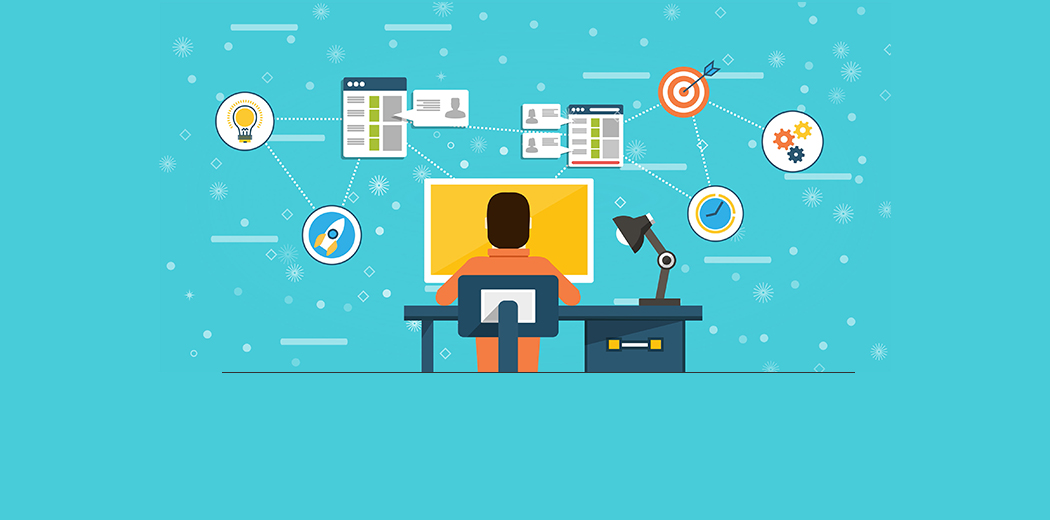

In [41]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\DataPreprocessing_And Feature_Engg.jpg", width = 500)

In [42]:
# Creating new features "TimeTakenForDelivery" With the help of "Created_at" and "actual_delivery_time" columns.

df["created_at"] = pd.to_datetime(df.created_at, errors = "coerce")
df["actual_delivery_time"] = pd.to_datetime(df.actual_delivery_time, errors = "coerce")



df["TimeTakenForDelivery"] =  df["actual_delivery_time"]- df["created_at"] 
df["TimeTakenForDelivery"]

0        0 days 01:02:59
1        0 days 01:07:04
2        0 days 00:29:41
3        0 days 00:51:15
4        0 days 00:39:50
               ...      
197423   0 days 01:05:07
197424   0 days 00:56:23
197425   0 days 00:50:08
197426   0 days 01:05:07
197427   0 days 00:37:08
Name: TimeTakenForDelivery, Length: 197428, dtype: timedelta64[ns]

In [43]:
df["TimeTakenForDelivery"].describe()

count                       197428
mean     0 days 00:47:50.302201308
std      0 days 05:41:18.561739175
min             -23 days +04:12:56
25%                0 days 00:35:04
50%                0 days 00:44:20
75%                0 days 00:56:21
max               98 days 13:47:39
Name: TimeTakenForDelivery, dtype: object

In [44]:
'''
By the statical view of the "TimeTakenForDelivery" Column Observations are

minimum  time to delivered to any product is -23 days and
maximum time to delivered to any product is 98 days 

which is kind of impossible thing bcz time not be in the negative
So, these are the outliers and we have to remove it.
'''

'\nBy the statical view of the "TimeTakenForDelivery" Column Observations are\n\nminimum  time to delivered to any product is -23 days and\nmaximum time to delivered to any product is 98 days \n\nwhich is kind of impossible thing bcz time not be in the negative\nSo, these are the outliers and we have to remove it.\n'

In [45]:
# We are removing the ouliers with Quarantile range

df["TimeTakenForDelivery_Seconds"] = df["TimeTakenForDelivery"].dt.total_seconds()
Q1 = df["TimeTakenForDelivery_Seconds"].quantile(0.25)
Q3 = df["TimeTakenForDelivery_Seconds"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

df["TimeTakenForDelivery_Seconds"] = np.where(
(df["TimeTakenForDelivery_Seconds"] < lower_bound) | (df["TimeTakenForDelivery_Seconds"] > upper_bound),
    np.nan, df["TimeTakenForDelivery_Seconds"]
)

df["TimeTakenForDelivery"] = pd.to_timedelta(df["TimeTakenForDelivery_Seconds"], unit = 's')

In [46]:
# After removing outliers we got 6285 rows havig missing value, so we need to impute it.

df["TimeTakenForDelivery"].isnull().sum()

6285

In [47]:
# Since our dataset is  datetime format and the best method is impute missing value in timeseries dataset is ffill or bfll so we can use  one of them.

df["TimeTakenForDelivery"].ffill(inplace = True)

In [48]:
# we imputed all missing value from of our dataset.
df["TimeTakenForDelivery"].isnull().sum()

0

In [49]:
# Since our dataset is  datetime format and the best method is impute missing value in timeseries dataset is ffill or bfll so we can use  one of them.

df["TimeTakenForDelivery_Seconds"].ffill(inplace = True)

In [50]:
df["TimeTakenForDelivery_Seconds"].isnull().sum()

0

In [51]:
# Statical View of "TimeTakenForDelivery" Column.
df["TimeTakenForDelivery"].describe()

count                       197428
mean     0 days 00:45:49.712872540
std      0 days 00:14:48.545796823
min                0 days 00:03:43
25%                0 days 00:34:51
50%                0 days 00:43:51
75%                0 days 00:55:02
max                0 days 01:28:16
Name: TimeTakenForDelivery, dtype: object

In [52]:
'''
Following are the Observations of the "TimeTakenForDelivery"  Columns.

Average time taken to delivered per per product ≈46 minutes,
Minimum time taken to delivered  any product    ≈4 minutes,
maximum time taken to delivered  any product    ≈89 minutes
maximu i.e, 75%(Product) delivered within the   55 minutes.

'''

'\nFollowing are the Observations of the "TimeTakenForDelivery"  Columns.\n\nAverage time taken to delivered per per product ≈46 minutes,\nMinimum time taken to delivered  any product    ≈4 minutes,\nmaximum time taken to delivered  any product    ≈89 minutes\nmaximu i.e, 75%(Product) delivered within the   55 minutes.\n\n'

In [53]:
# Creating new features "HourOfDay", "DayOfWeek", "Month"

df["HourOfDay"] = df["created_at"].dt.hour
df["DayOfWeek"] = df["created_at"].dt.dayofweek
df["month"]   = df["created_at"].dt.month
df["week"] = df["created_at"].dt.isocalendar().week
df["year"]  = df["created_at"].dt.year

In [54]:
# Extracting new features like "TimeTakenForDelivery_Minutes" and "TimeTakenForDelivery_Hours"

df["TimeTakenForDelivery_Minutes"]  =    df["TimeTakenForDelivery"].dt.total_seconds()/60
df["TimeTakenForDelivery_Hours"]    =    df["TimeTakenForDelivery"].dt.total_seconds()/3600

In [55]:
# Extracting new features from "Delivery_categories" as how how fast and slow we are able to deliver the product.
'''
Since we have all time format like ["TimeTakenForDelivery_Seconds", "TimeTakenForDelivery_Minutes, 
TimeTakenForDelivery_Hours"] but we can extract this feature with the help of minutes bcz maximum, and average
delivery time fall within the hour.

'''

df["Delivery_Categories"] = pd.cut(df["TimeTakenForDelivery_Minutes"], 
                                   bins = [3, 30, 40, 60, 90], 
                                   labels = ["Fast", "Moderate", "Slow", "Very Slow"])

In [56]:


'''
Here we can see that the our maximum order delivered  come inside Slow Categories and
less order are in the fast and moderate categories.
'''

df["Delivery_Categories"].value_counts()

Delivery_Categories
Slow         85291
Moderate     51013
Very Slow    34582
Fast         26542
Name: count, dtype: int64

In [57]:
# Creating new features like how much time taken per item for delivered.

df["DeliverySpeedPerItem"] = df["TimeTakenForDelivery_Minutes"] / df["total_items"]
df["DeliverySpeedPerItem"].value_counts()

DeliverySpeedPerItem
16.200000    67
19.000000    65
16.050000    65
15.750000    61
14.350000    61
             ..
6.361538      1
3.334127      1
2.242857      1
1.338506      1
3.527778      1
Name: count, Length: 24743, dtype: int64

In [58]:
# Here we are extracting the features like "AvgItemPrice".

df["AvgItemPrice"] = df["subtotal"] / df["total_items"]
df["AvgItemPrice"].value_counts()

AvgItemPrice
1095.000000    1508
995.000000     1421
895.000000     1364
795.000000     1313
1200.000000    1280
               ... 
2664.500000       1
2011.666667       1
1352.666667       1
544.600000        1
367.200000        1
Name: count, Length: 18803, dtype: int64

                 ●	Encoding categorical columns

In [59]:
Categorical_df = df.select_dtypes(include = "object")

Encoded_Categorical_df = pd.get_dummies(Categorical_df, drop_first = True)

'''
Since we Encoded our all categorical columns like  "store_id", "store_primary_category" 
that's the reason we have many columns in Encoded_Categorical_df so the memory usage by data is 1.3 GB.

'''

'\nSince we Encoded our all categorical columns like  "store_id", "store_primary_category" \nthat\'s the reason we have many columns in Encoded_Categorical_df so the memory usage by data is 1.3 GB.\n\n'

In [60]:
Encoded_Categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Columns: 6815 entries, store_id_00053f5e11d1fe4e49a221165b39abc9 to store_primary_category_vietnamese
dtypes: bool(6815)
memory usage: 1.3 GB


# 3. Data Visualization and Cleaning

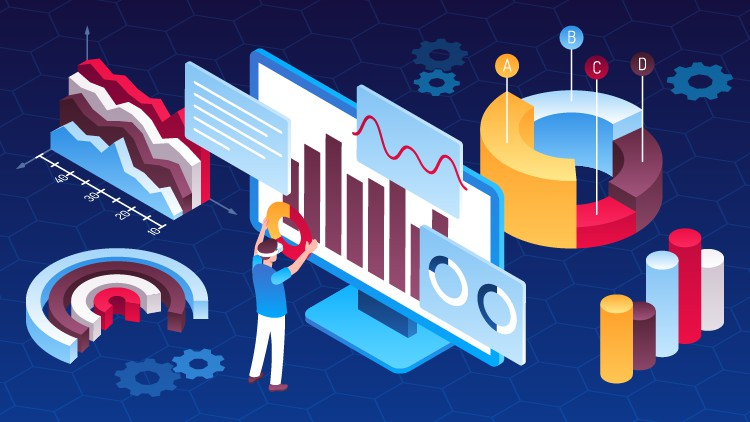

In [61]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\Data Visualization.jpg", width = 500)

In [62]:
'''
Since We Cleaned our dataset previously so don't need to clean it again if we feel 
some thing which can corrected and add on we will do it further.

'''

"\nSince We Cleaned our dataset previously so don't need to clean it again if we feel \nsome thing which can corrected and add on we will do it further.\n\n"

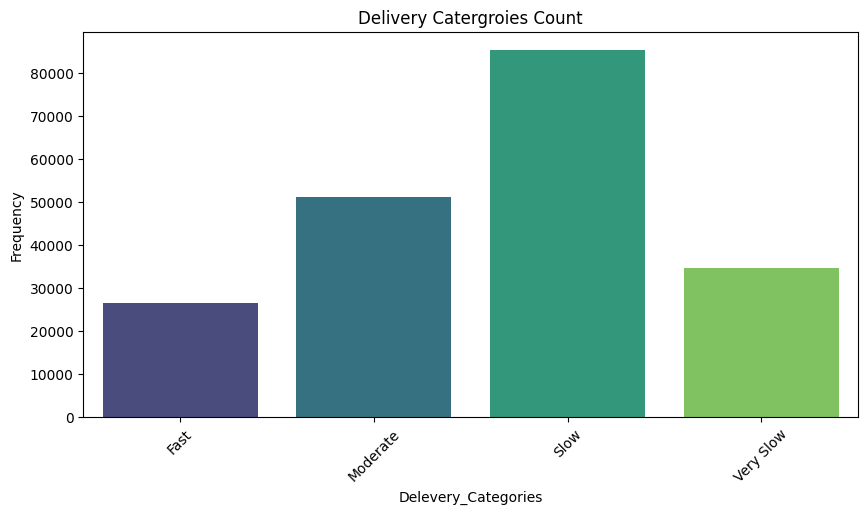

In [63]:
# trying to identify the how the Delivery Categories Data distributed.

plt.figure(figsize = (10, 5))

sns.countplot(x = "Delivery_Categories", data = df, palette = "viridis")
plt.title("Delivery Catergroies Count")
plt.xlabel("Delevery_Categories")
plt.ylabel("Frequency")
plt.xticks(rotation = 45)
plt.show()

In [64]:
'''
Here we can see that the our maximum product come inside the slow, moderate categoreis and less are come
inside the very slow, fast categories respectively.
'''

'\nHere we can see that the our maximum product come inside the slow, moderate categoreis and less are come\ninside the very slow, fast categories respectively.\n'

In [65]:
df["subtotal"] = pd.to_numeric(df["subtotal"], errors = "coerce")
df["TimeTakenForDelivery_Minutes"] = pd.to_numeric(df["TimeTakenForDelivery_Minutes"], errors = "coerce")

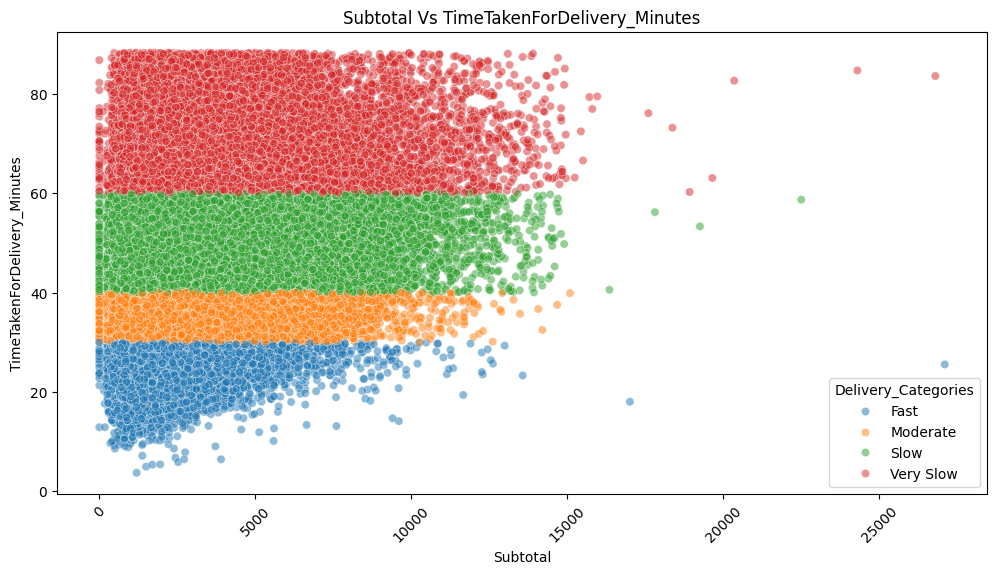

In [66]:
# we are identifying the pattern of subtotal and total_time time taken in delivery with the bifarcation of Delivery_categories.

plt.figure(figsize = (12, 6))

sns.scatterplot(x ="subtotal", y = "TimeTakenForDelivery_Minutes", data = df, hue = "Delivery_Categories", alpha = 0.5)
plt.title("Subtotal Vs TimeTakenForDelivery_Minutes")
plt.xlabel("Subtotal")
plt.ylabel("TimeTakenForDelivery_Minutes")
plt.xticks(rotation = 45)
plt.show()


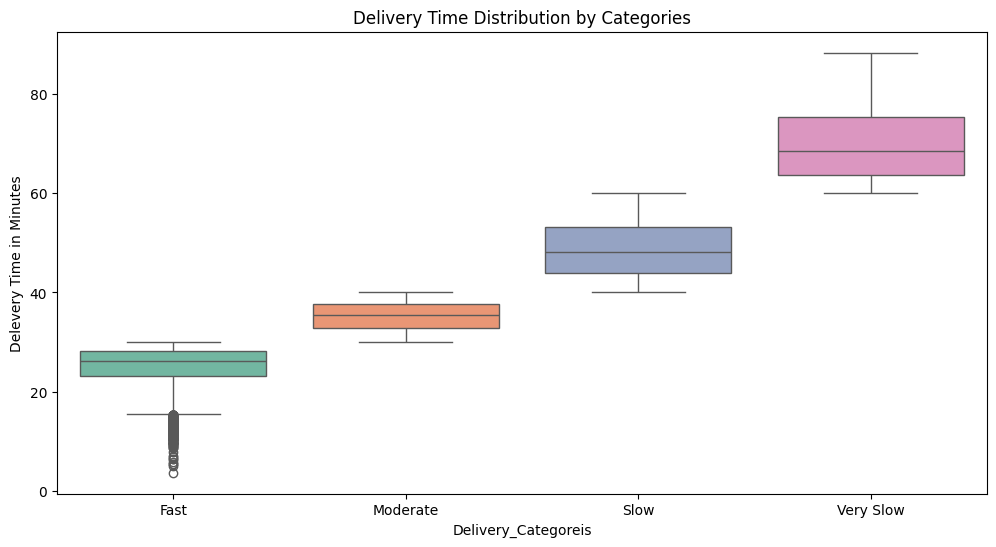

In [67]:
plt.figure(figsize = (12, 6))

sns.boxplot(data = df, y = "TimeTakenForDelivery_Minutes", 
              x = "Delivery_Categories", palette = "Set2" )
plt.title("Delivery Time Distribution by Categories")
plt.xlabel("Delivery_Categoreis")
plt.ylabel("Delevery Time in Minutes")
plt.show()

In [68]:
df["TimeTakenForDelivery_Minutes"].describe()

count    197428.000000
mean         45.828548
std          14.809097
min           3.716667
25%          34.850000
50%          43.850000
75%          55.033333
max          88.266667
Name: TimeTakenForDelivery_Minutes, dtype: float64

In [69]:
'''
After the analysis of Scatter plot and Box we can say that the some of the ouliers in "TimeTakenForDelivery_Minutes" Column
also the Statical view indicate that then we have to eliminate the outliers.

'''

'\nAfter the analysis of Scatter plot and Box we can say that the some of the ouliers in "TimeTakenForDelivery_Minutes" Column\nalso the Statical view indicate that then we have to eliminate the outliers.\n\n'

In [70]:
# Removing ouliers with the help of interquartile range(IQR)


Q1 = df["TimeTakenForDelivery_Minutes"].quantile(0.25)
Q3 = df["TimeTakenForDelivery_Minutes"].quantile(0.75)


IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["TimeTakenForDelivery_Minutes"] = np.where(
    (df["TimeTakenForDelivery_Minutes"] < lower_bound) | (df["TimeTakenForDelivery_Minutes"] > upper_bound),
                                              np.nan,df["TimeTakenForDelivery_Minutes"])

df["TimeTakenForDelivery_Minutes"] = pd.to_timedelta(df["TimeTakenForDelivery_Minutes"], unit = "m")

In [71]:
# Since we removed outliers from the colmns that's the reason we receving missing values in 1335 columns we have to impute it.

df["TimeTakenForDelivery_Minutes"].isnull().sum()

1335

In [72]:
# Since our column containing timeseries data and as we know best suited for this ffill|bfll.

df["TimeTakenForDelivery_Minutes"].bfill(inplace = True)


In [73]:
# We imputed all missing values from the columns.

df["TimeTakenForDelivery_Minutes"].isnull().sum()


0

                         ●	Plotting the data again to see improvements

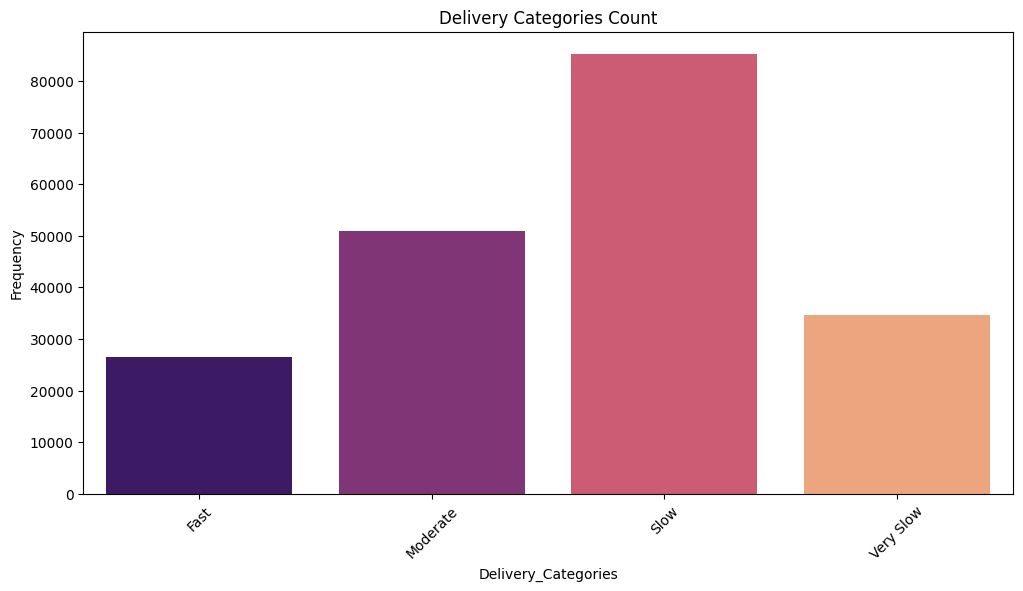

In [74]:
plt.figure(figsize=(12,6))
sns.countplot(x = "Delivery_Categories", data = df, palette = "magma")
plt.title("Delivery Categories Count")
plt.xlabel("Delivery_Categories")
plt.ylabel("Frequency")
plt.xticks(rotation = 45)
plt.show()

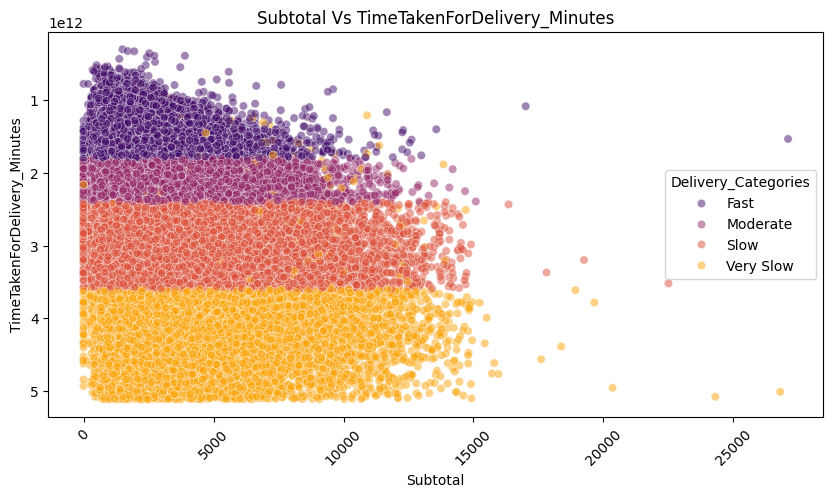

In [75]:
plt.figure(figsize = (10, 5))

sns.scatterplot(x = "subtotal", y = "TimeTakenForDelivery_Minutes", hue = "Delivery_Categories", data = df, 
                palette = "inferno", alpha = 0.5)
plt.title("Subtotal Vs TimeTakenForDelivery_Minutes")
plt.xlabel("Subtotal")
plt.ylabel("TimeTakenForDelivery_Minutes")
plt.xticks(rotation = 45)
plt.show()

In [76]:
'''
Since We removed ouliers from the "TimeTakenForDelivery_Minutes"  So this is the clear graphical representation of our data.
But after the analyze of "subtotal" and "TimeTakenForDelivery_Minutes" we can say that the these are not strongly corelated
bcz geneally in correlation both are increasing or decreasing that means the positive corelation and negative corelation.

But in our case it's the constant like "subtotal" amount is 10000 but the "TimeTakenForDelivery_Minutes" is the same as 
"subtotal" amount is 5000 there no chaninging like positively or negatively.

'''

'\nSince We removed ouliers from the "TimeTakenForDelivery_Minutes"  So this is the clear graphical representation of our data.\nBut after the analyze of "subtotal" and "TimeTakenForDelivery_Minutes" we can say that the these are not strongly corelated\nbcz geneally in correlation both are increasing or decreasing that means the positive corelation and negative corelation.\n\nBut in our case it\'s the constant like "subtotal" amount is 10000 but the "TimeTakenForDelivery_Minutes" is the same as \n"subtotal" amount is 5000 there no chaninging like positively or negatively.\n\n'

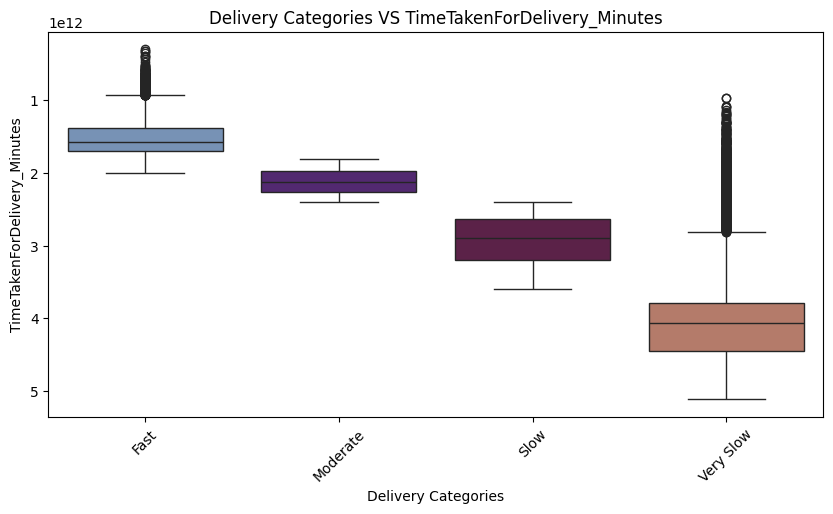

In [77]:
plt.figure(figsize = (10, 5))

sns.boxplot(x = "Delivery_Categories", y = "TimeTakenForDelivery_Minutes", data = df, palette = "twilight")
plt.title("Delivery Categories VS TimeTakenForDelivery_Minutes")
plt.xlabel("Delivery Categories")
plt.ylabel("TimeTakenForDelivery_Minutes")
plt.xticks(rotation = 45)
plt.show()

In [78]:
''' 
After removing outlier we get the clear picture view of our data but you can see in the Fast Categories There  are some  
points which are the outside of whishkers but these aren't outliers, bcz box plot follow the InterQuarntilerange(IQR)


Thats  means the  middle line of the box plot is 50(percentile), lower than the middle line is 25(percentile) that is lower_bound
and upper than the middle line is 75(percentile) that is upper_bound.

and as we know the 
upper_bound = Q3(75 percentile) + 1.5 * IQR,
lower_bound =  Q1(25 percentile) - 1.5 * IQR

So in our case it might be possible the bins and labels we calculated that are excedd this upper and lower bound 
that's the region we are receving outliers.

''' 

" \nAfter removing outlier we get the clear picture view of our data but you can see in the Fast Categories There  are some  \npoints which are the outside of whishkers but these aren't outliers, bcz box plot follow the InterQuarntilerange(IQR)\n\n\nThats  means the  middle line of the box plot is 50(percentile), lower than the middle line is 25(percentile) that is lower_bound\nand upper than the middle line is 75(percentile) that is upper_bound.\n\nand as we know the \nupper_bound = Q3(75 percentile) + 1.5 * IQR,\nlower_bound =  Q1(25 percentile) - 1.5 * IQR\n\nSo in our case it might be possible the bins and labels we calculated that are excedd this upper and lower bound \nthat's the region we are receving outliers.\n\n"

In [79]:
df["order_protocol"].value_counts()

order_protocol
1.0    54987
3.0    53452
5.0    44516
2.0    24192
4.0    19460
6.0      802
7.0       19
Name: count, dtype: int64

In [80]:
df["TimeTakenForDelivery_Minutes"].value_counts()

TimeTakenForDelivery_Minutes
0 days 00:41:22.999999998    133
0 days 00:38:00              127
0 days 00:38:01.000000002    122
0 days 00:43:30              121
0 days 00:37:43.000000002    121
                            ... 
0 days 00:11:42                1
0 days 00:13:48                1
0 days 00:14:36                1
0 days 00:10:30                1
0 days 00:11:43.000000002      1
Name: count, Length: 4408, dtype: int64

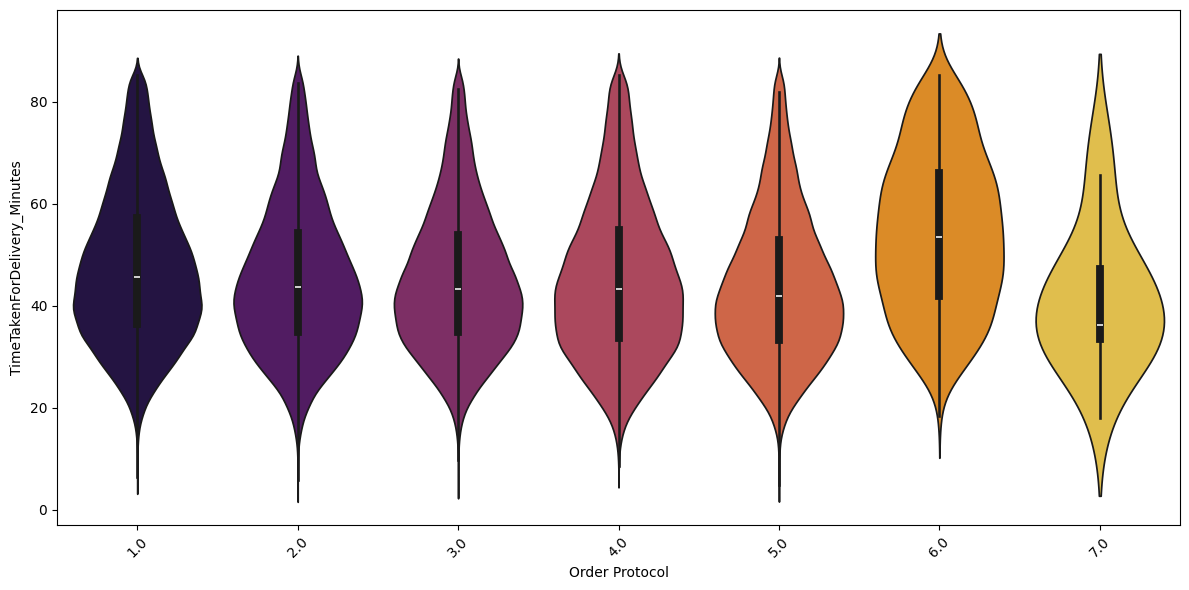

In [81]:
# Here we are trying to find how "order_protocol" and "TimeTakenForDelivery_Minutes" effecting perfomance of our Buisness.

df["TimeTakenForDelivery_Minutes"] = df["TimeTakenForDelivery_Minutes"].dt.total_seconds()/60

plt.figure(figsize = (12,6))
sns.violinplot(x = "order_protocol", y = "TimeTakenForDelivery_Minutes", data = df, palette = "inferno")
plt.xlabel("Order Protocol")
plt.ylabel("TimeTakenForDelivery_Minutes")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [82]:
# Violin plot is the Combination of box plot an KDE plot Where 
'''
white Dot indicates the median(),
Thick black bar indicates the IQR,
thin black bar indicates the NonOutLier values
and the width of violinplot indicates the density of the data
where widest part indicates the maximum density.

'''
# in our case following are the observations
'''
maximum order delivered falls between the 40 to 50 minutes and the "order_protocol: 6.0 shows the more versality"
'''

'\nmaximum order delivered falls between the 40 to 50 minutes and the "order_protocol: 6.0 shows the more versality"\n'

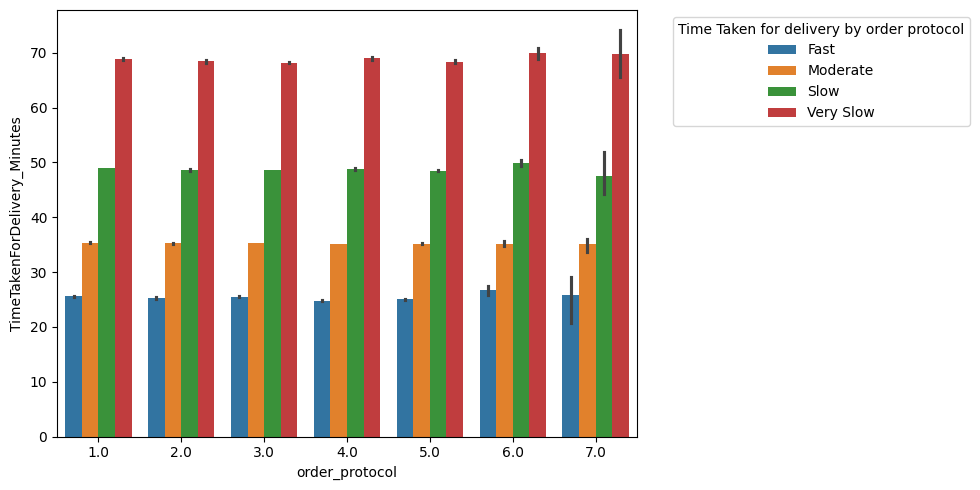

In [83]:
# we are trying to find how "order_protocol" and "TimeTakenForDelivery_Minutes" bifarcation of "Delivery_Categories"

plt.figure(figsize = (10, 5))
sns.barplot(x="order_protocol", y="TimeTakenForDelivery_Minutes",hue = "Delivery_Categories", data=df)
plt.legend(title = "Time Taken for delivery by order protocol", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()
plt.show()


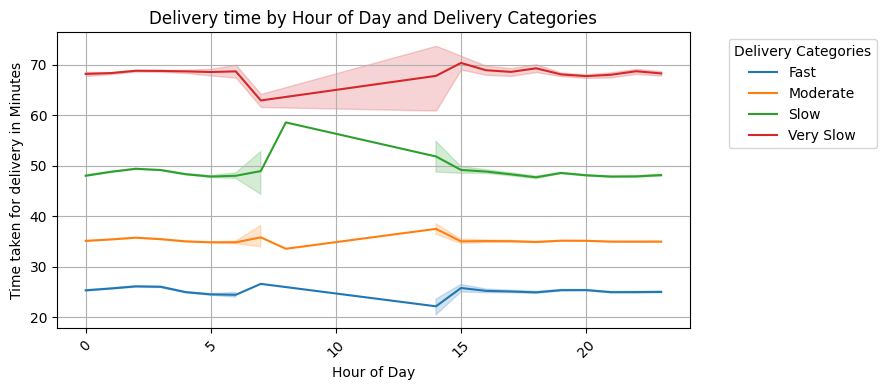

In [84]:
# patterns and trends

plt.figure(figsize = (9, 4))
sns.lineplot(x = "HourOfDay", y = "TimeTakenForDelivery_Minutes", data = df, hue = "Delivery_Categories")
plt.title("Delivery time by Hour of Day and Delivery Categories")
plt.xlabel("Hour of Day")
plt.ylabel("Time taken for delivery in Minutes")
plt.legend(title = "Delivery Categories",bbox_to_anchor = (1.05,1),  loc = "upper left")
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()

In [85]:
# following are the observations of linePlot
'''
Blue(Fast) most order delivered in fast section within between the 20 and 30 minutes
yellow(moderate) all the  order delivered in moderate section between the 30 and 40 minutes
greeen(slow) all the order delivered in slow section between 50 and 60 minutes and the last
red(very slow) section order delivered more than 70 minutes.

'''

'\nBlue(Fast) most order delivered in fast section within between the 20 and 30 minutes\nyellow(moderate) all the  order delivered in moderate section between the 30 and 40 minutes\ngreeen(slow) all the order delivered in slow section between 50 and 60 minutes and the last\nred(very slow) section order delivered more than 70 minutes.\n\n'

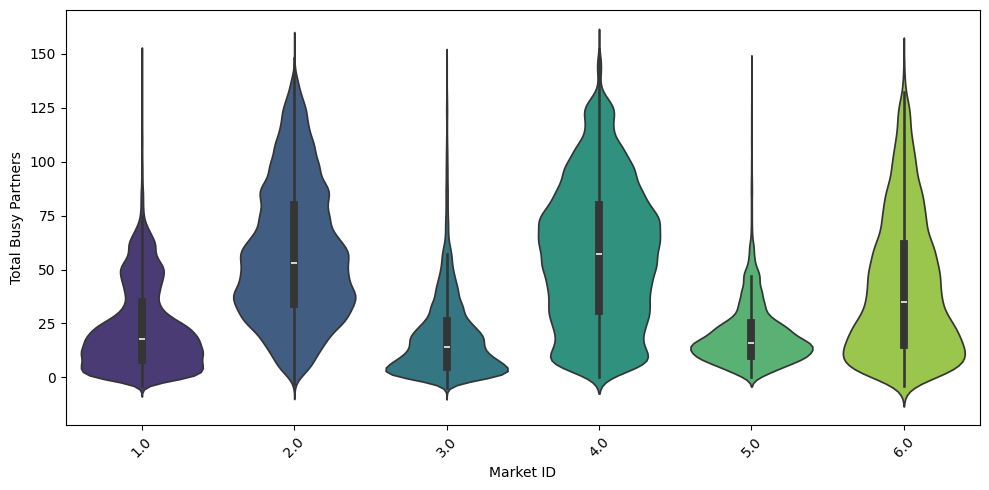

In [86]:
# here we are looking for the how "total_busy_partners" and "market_id" columns are releated to each other.

plt.figure(figsize = (10, 5))
sns.violinplot(x = "market_id", y = "total_busy_partners", data = df, palette = "viridis")
plt.xlabel("Market ID")
plt.ylabel("Total Busy Partners")
plt.xticks(rotation = 45)             
plt.tight_layout()
plt.show()

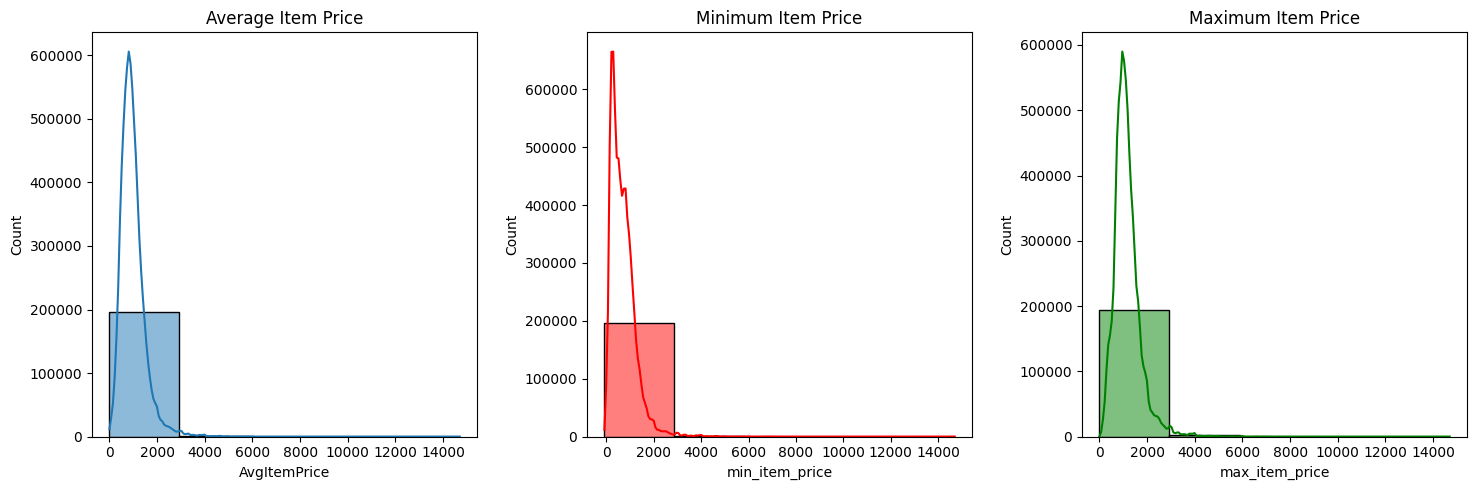

In [87]:
# Trying to find the how our service/product releated to on "min_item_price", "AvgItemPrice" and "max_item_price".

fig, axes = plt.subplots(1, 3,figsize = (15, 5))

sns.histplot(x = "AvgItemPrice", data = df, palette = "viridis", ax = axes[0], kde = True, bins = 5)
axes[0].set_title("Average Item Price")

sns.histplot(x = "min_item_price", data = df, color = "red", ax = axes[1], kde = True, bins = 5)
axes[1].set_title("Minimum Item Price")

sns.histplot(x = "max_item_price", data = df, color = "green", ax = axes[2], kde = True, bins = 5)
axes[2].set_title("Maximum Item Price")

plt.tight_layout()
plt.show()


In [88]:
'''
By the observations of "AvergareItemPrice", "MimimumItemPrice and "MaximumItemPrice", we can say that the 
our all three are similar means in "AvgItemPrice", maximum product/services are in range 0-2000 like the "MinimuItemPrice", and
"maxItemPrice".

So our maximum revenue comes from the "MimimumItemPrice" and very less revenue from the "MaxItemPrice" 
our product/servieces Budget Friendly and best suited for middle class family.

'''

'\nBy the observations of "AvergareItemPrice", "MimimumItemPrice and "MaximumItemPrice", we can say that the \nour all three are similar means in "AvgItemPrice", maximum product/services are in range 0-2000 like the "MinimuItemPrice", and\n"maxItemPrice".\n\nSo our maximum revenue comes from the "MimimumItemPrice" and very less revenue from the "MaxItemPrice" \nour product/servieces Budget Friendly and best suited for middle class family.\n\n'

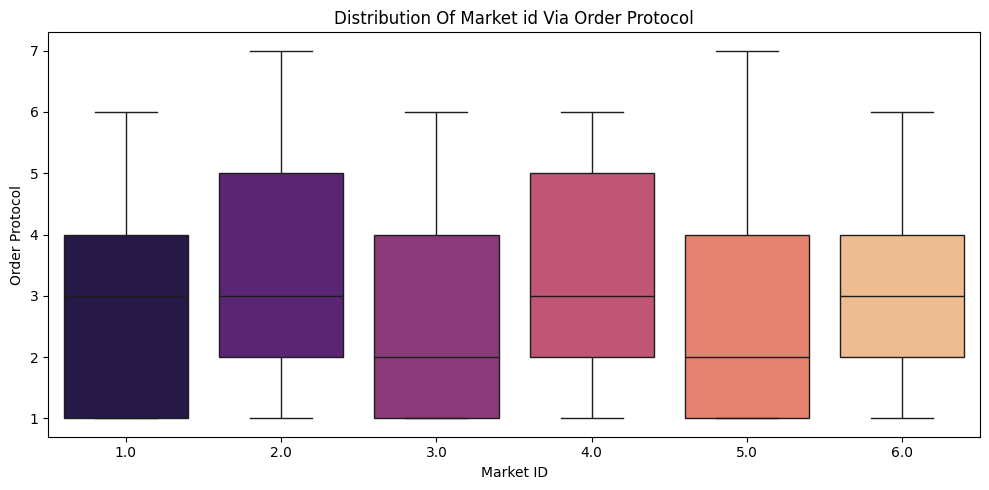

In [89]:
# Here we are trying to find the Distribution Of Market id By Order Protocol

plt.figure(figsize = (10, 5))
sns.boxplot(x ="market_id", y = "order_protocol", data = df, palette = "magma")
plt.title("Distribution Of Market id Via Order Protocol")
plt.xlabel("Market ID")
plt.ylabel("Order Protocol")
plt.tight_layout()
plt.show()

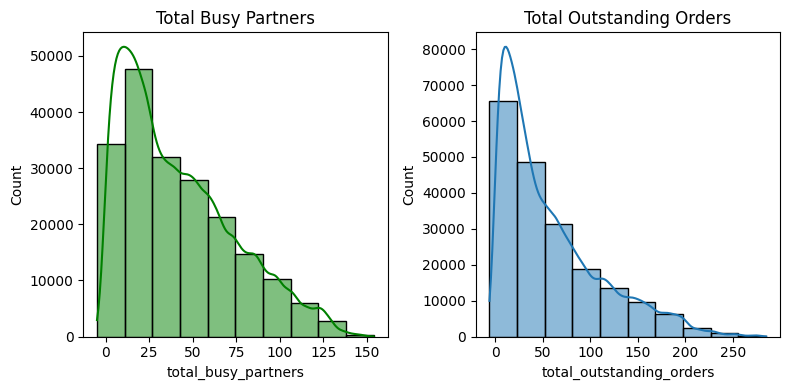

In [90]:
# Here we are looking how  "total_outstanding_orders" and "total_busy_partners" are affecting our services.

fig, axes = plt.subplots(1, 2, figsize = (8, 4))

sns.histplot(x = "total_busy_partners", data = df, kde = True, bins = 10, ax = axes[0], color = "green")
axes[0].set_title("Total Busy Partners")

sns.histplot(x = "total_outstanding_orders", data = df, kde = True, bins = 10, ax = axes[1], palette = "red")
axes[1].set_title("Total Outstanding Orders")

plt.tight_layout()
plt.show()

In [91]:
# Observations are following of the "TotalBusyPartners" and "TotalOutsandingOrders"

#	total_busy_partners: Number of delivery partners attending to other tasks
'''
Since our "TotalBusyPartners" fall within 0-160 the maximum and peak "TotalBusyPartners" is 20 and count more than 50000
after that second most "TotalBusyPartners" ≈ 15 and count is ≈ 35000.
'''


#	total_outstanding_orders: Total number of orders to be fulfilled at that moment
'''
Since our "TotalOutstandingOrders" fall between  0-250 and maximum "TotalOutstandingOrders"  deliver at ≈30 and count ≈65000
and second most "TotalOutstandingOrders" at  ≈ 40 and frequency  is ≈ 50000. 
'''


'\nSince our "TotalOutstandingOrders" fall between  0-250 and maximum "TotalOutstandingOrders"  deliver at ≈30 and count ≈65000\nand second most "TotalOutstandingOrders" at  ≈ 40 and frequency  is ≈ 50000. \n'

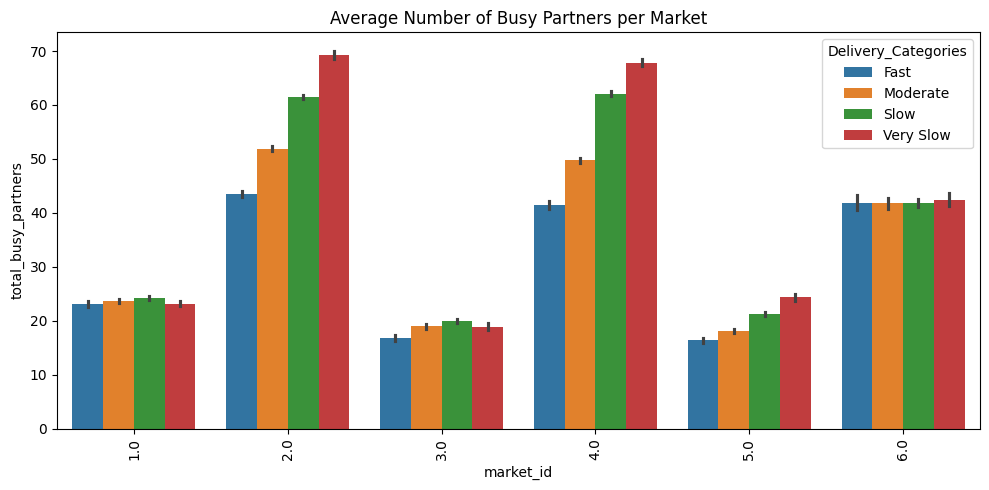

In [92]:
plt.figure(figsize = (10, 5))
sns.barplot(x="market_id", y="total_busy_partners", hue = "Delivery_Categories", data=df)
plt.title("Average Number of Busy Partners per Market")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

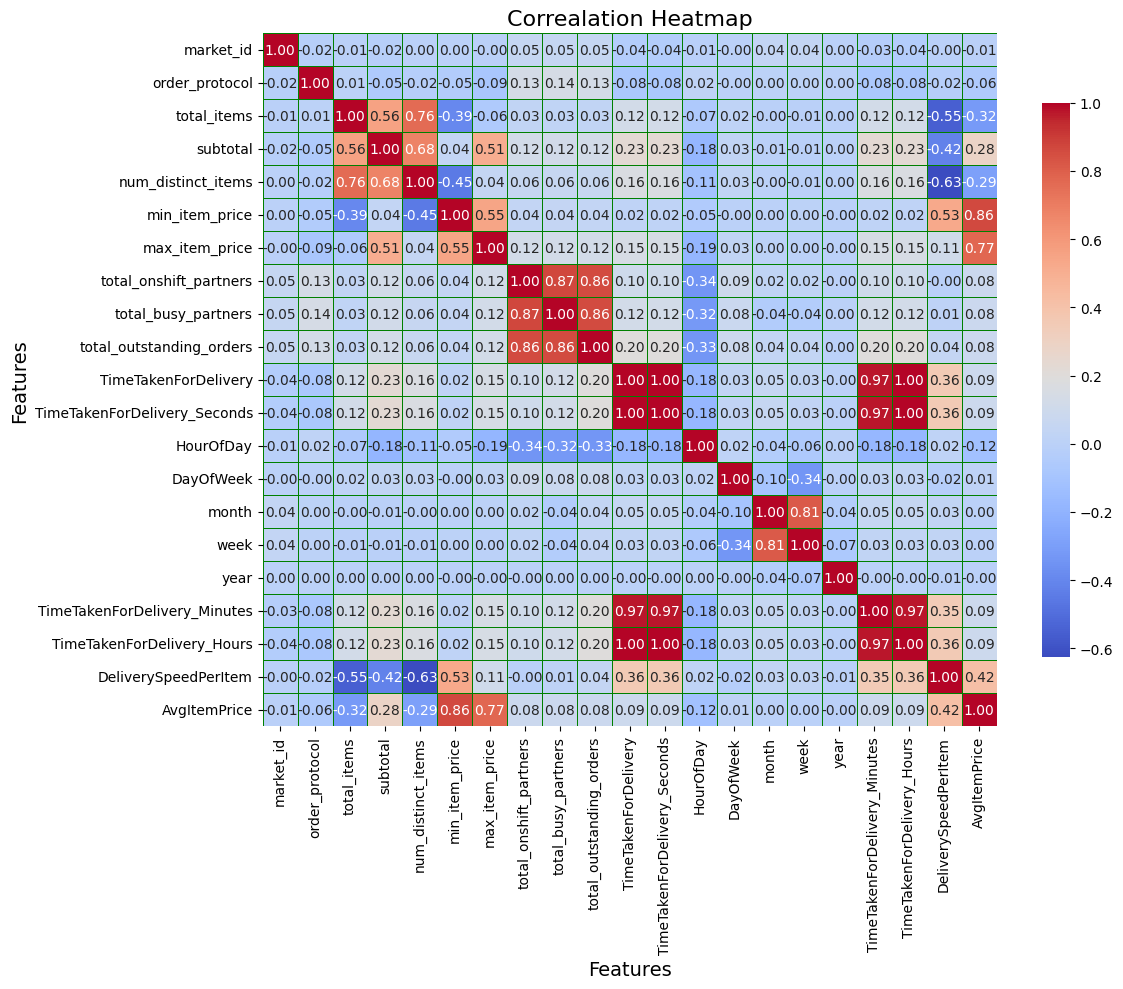

In [93]:
numeric_df = df.select_dtypes(include = [np.number])
corr = numeric_df.corr()

plt.figure(figsize = (12, 10))
 
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = "0.2f", 
            linewidth = 0.5, linecolor = 'green', cbar_kws = {"shrink" : 0.8}, annot_kws = {"size" : 10})
plt.title("Correalation Heatmap", fontsize = 16)
plt.xlabel("Features", fontsize = 14)
plt.ylabel("Features", fontsize = 14)
plt.tight_layout()
plt.show()

In [94]:
'''
Here we can see that  correlation between all features in the heatmap 
(a). The Darker color represents the feature is highly corelated, lighter color indicates the less corelated to each other 
and white color is indicate the no corelation or the almost neglible corelation between the features.

(b). The highly corelated represents with the positive (1), highly negative corelated represents with the negative (-1) 
and the neglible corelation represents with the (0)
'''

'\nHere we can see that  correlation between all features in the heatmap \n(a). The Darker color represents the feature is highly corelated, lighter color indicates the less corelated to each other \nand white color is indicate the no corelation or the almost neglible corelation between the features.\n\n(b). The highly corelated represents with the positive (1), highly negative corelated represents with the negative (-1) \nand the neglible corelation represents with the (0)\n'

# 4(a). Insights

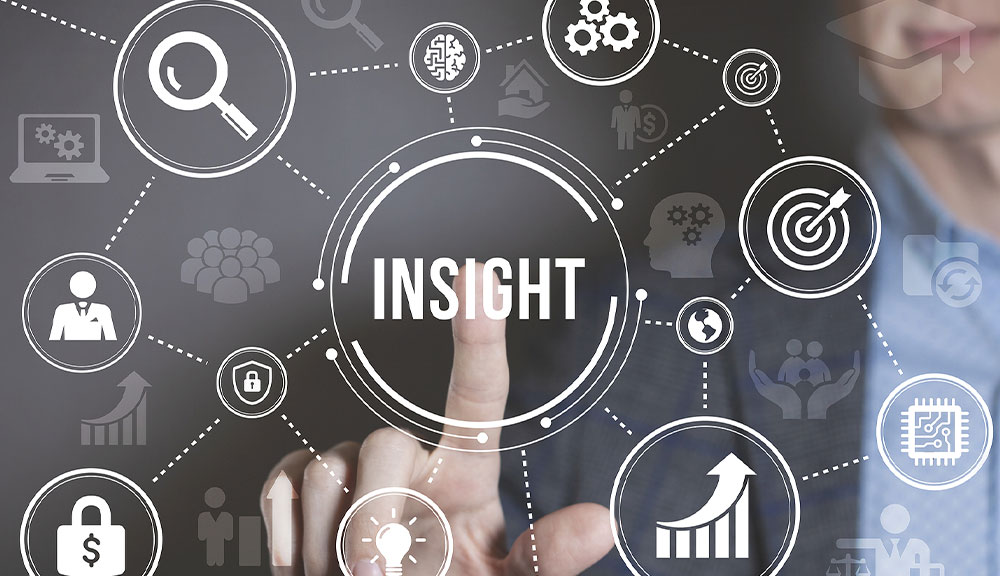

In [95]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\Insight.jpg", width = 500)

In [96]:
'''
(1).Delivery Speed : our most Delivery Categories fall inside the "slow", "moderate" and very less come inside the 
                  "fast","very slow" categories. also  "HourOFDay" at peak some time not able to handle the customers.
                  having high "num_distinct_items"  takes more time to deliver the product.
'''

'\n(1).Delivery Speed : our most Delivery Categories fall inside the "slow", "moderate" and very less come inside the \n                  "fast","very slow" categories. also  "HourOFDay" at peak some time not able to handle the customers.\n                  having high "num_distinct_items"  takes more time to deliver the product.\n'

In [97]:
'''
(2).Total Busy Partners and  Total OutStanding Orders: at the peak performance "TotalBusyPartners" are less and other time 
                                                       there much more "partnres" also the "TotalOutStandingOrders comes
                                                       between the 0-40.
'''

'\n(2).Total Busy Partners and  Total OutStanding Orders: at the peak performance "TotalBusyPartners" are less and other time \n                                                       there much more "partnres" also the "TotalOutStandingOrders comes\n                                                       between the 0-40.\n'

In [98]:
'''
(3).Customer Spending and Item Trends : our maximum customer are in the minimum categroies and services they are using which
                                        Budegt friendly, so we can say that our product is generally use by middle class family.
'''

'\n(3).Customer Spending and Item Trends : our maximum customer are in the minimum categroies and services they are using which\n                                        Budegt friendly, so we can say that our product is generally use by middle class family.\n'

In [99]:
'''
(4).Market and Total Busy Partners : in market id "2.0" and "4.0" high freqency and the servieces  in the high density 
                                     these two market have high demand and rest of all are the in the general 
                                     but we are not able to full fill the demand bcz here we delivered maximum order in
                                     "moderate" and "slow" Categories.
'''

'\n(4).Market and Total Busy Partners : in market id "2.0" and "4.0" high freqency and the servieces  in the high density \n                                     these two market have high demand and rest of all are the in the general \n                                     but we are not able to full fill the demand bcz here we delivered maximum order in\n                                     "moderate" and "slow" Categories.\n'

In [100]:
'''
(5).Store and Market :store are releated on the market we observed that the market highly coreleated to the market bcz 
                      in the bifarcation of "Delivery_Categories" we got the maximum order are fall in the "slow" categories.
'''

'\n(5).Store and Market :store are releated on the market we observed that the market highly coreleated to the market bcz \n                      in the bifarcation of "Delivery_Categories" we got the maximum order are fall in the "slow" categories.\n'

In [101]:
'''
(6).Order Proctol and Partner Effciency : in some protocol we are able to handle the delivery but in some we are not bcz we 
                                          our onshift parners are less and not full fill the demand.
'''

'\n(6).Order Proctol and Partner Effciency : in some protocol we are able to handle the delivery but in some we are not bcz we \n                                          our onshift parners are less and not full fill the demand.\n'

In [102]:
'''
(7).Operational Efficency : A high number of "total_OutSatanding_Orders" are releated to delayed delevires specially in the 
                            "TotalBusyPartners" during the peak hour we don't have enough work force to handle the volume of 
                            orders.
                            There are Seven(7) "Orde_protcol" that's the reason we have verify Orders coming from where like
                           through Porter,call to restaurant, pre-booked, third-party, etc. all these thing taking to much time.
'''

'\n(7).Operational Efficency : A high number of "total_OutSatanding_Orders" are releated to delayed delevires specially in the \n                            "TotalBusyPartners" during the peak hour we don\'t have enough work force to handle the volume of \n                            orders.\n                            There are Seven(7) "Orde_protcol" that\'s the reason we have verify Orders coming from where like\n                           through Porter,call to restaurant, pre-booked, third-party, etc. all these thing taking to much time.\n'

# 4(b). Recommendations 

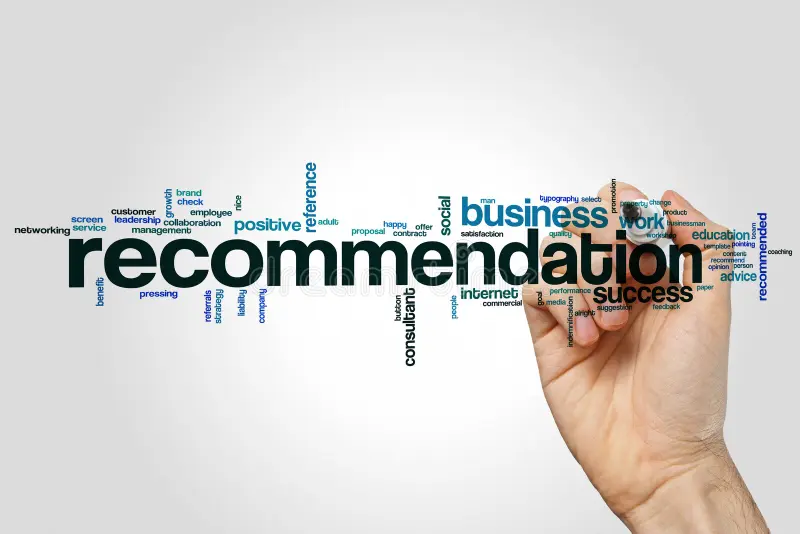

In [103]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\Recommendations.png", width = 500)

In [104]:
'''
(1).Delivery Speed Optimization : most of our fall in "moderate" and "slow" category and in peak hour we are not able to 
                                  full fill the demand.
                                  
                                  We can increase the staff during the peak hour and ensure there are enough delivery partners
                                  at peak hours we adjust this to give over time to the delivery partners.
                                  
                                  implement incentive program for those delivery who frequently delivered product in the fast
                                  Category, this can boost overall speed and keep partners to motivate and redirect their root.
                                  
'''

'\n(1).Delivery Speed Optimization : most of our fall in "moderate" and "slow" category and in peak hour we are not able to \n                                  full fill the demand.\n                                  \n                                  We can increase the staff during the peak hour and ensure there are enough delivery partners\n                                  at peak hours we adjust this to give over time to the delivery partners.\n                                  \n                                  implement incentive program for those delivery who frequently delivered product in the fast\n                                  Category, this can boost overall speed and keep partners to motivate and redirect their root.\n                                  \n'

In [105]:
'''
(2).Flexible workhour : Offers flexible work hour to the delivery partners, allow them to work at the peak hours 
                        handle the work and reduce the totalOutstandingOrders.
'''

'\n(2).Flexible workhour : Offers flexible work hour to the delivery partners, allow them to work at the peak hours \n                        handle the work and reduce the totalOutstandingOrders.\n'

In [106]:
'''
(3).Customer Segmentation and Targeting : Since Our customer is budget consious and specially middle class.

                                        introduce the premium services for premium customer those who pay for the
                                        superfast delivery orders.
                                        
                                        provide the some discount in the premium services during the non peak hours.
                                        we can introduce the customer loyality program for the customer those who are 
                                        frequently orders and refer their freinds give them the rewards or offer premium
                                        services at more discount.
                                        
'''

'\n(3).Customer Segmentation and Targeting : Since Our customer is budget consious and specially middle class.\n\n                                        introduce the premium services for premium customer those who pay for the\n                                        superfast delivery orders.\n                                        \n                                        provide the some discount in the premium services during the non peak hours.\n                                        we can introduce the customer loyality program for the customer those who are \n                                        frequently orders and refer their freinds give them the rewards or offer premium\n                                        services at more discount.\n                                        \n'

In [107]:
'''
(4).Market Specific Starategdy : in market 4.0 and market 6.0 high demand and we are not able full fill it also our 
                                 Delivery Category is slow.
                                 
                                 Assign more delivery partners and resources during the peak hours partnership with local retails
                                 to take geographic advantages.
'''

'\n(4).Market Specific Starategdy : in market 4.0 and market 6.0 high demand and we are not able full fill it also our \n                                 Delivery Category is slow.\n                                 \n                                 Assign more delivery partners and resources during the peak hours partnership with local retails\n                                 to take geographic advantages.\n'

In [108]:
'''
(5).Store Level Improvement : Stores are highly corelated with the speed of delivery in slow Categories.
                              Regulary audit the high volume orders and why is it slow that means
                              in preparation time, inventory management, order processing or something for causing the delays.
                              
                              work with stream  line and give the clear instuction and provide training if it necessary,
                              introduce the incentive for who those delivered the high volume product in fast Category.
'''

'\n(5).Store Level Improvement : Stores are highly corelated with the speed of delivery in slow Categories.\n                              Regulary audit the high volume orders and why is it slow that means\n                              in preparation time, inventory management, order processing or something for causing the delays.\n                              \n                              work with stream  line and give the clear instuction and provide training if it necessary,\n                              introduce the incentive for who those delivered the high volume product in fast Category.\n'

In [109]:
'''
(6).Improving Order protocol Efficency : Some order protocols types are more efficent and some are stuggling to fullfil their 
                                         orders due to the lack of partners.
                                         
                                         introduce streamline protocols and assign the protocols types like directly pre-booked,
                                         and third party protocols automatically ordered no need to manual verification and
                                         confiramtion. 
                                         introduce the AI which assign the assigment of Orders equally or less dependent on a 
                                         special Store.
'''

'\n(6).Improving Order protocol Efficency : Some order protocols types are more efficent and some are stuggling to fullfil their \n                                         orders due to the lack of partners.\n                                         \n                                         introduce streamline protocols and assign the protocols types like directly pre-booked,\n                                         and third party protocols automatically ordered no need to manual verification and\n                                         confiramtion. \n                                         introduce the AI which assign the assigment of Orders equally or less dependent on a \n                                         special Store.\n'

In [110]:
'''
(7). Customer Satisfacion Initiatives : Delay and slower services in some category leading to lower customer satisfaction.

                                        implement a feedback mechanism where customer can give the real time feedback and
                                        after use this data we can identify what is most concern of customer
                                        as delivey speed or the better communication.
                                        
                                        provide real time tracking system and estimated time to deliverd the product also
                                        inform them if in case the product will deliver late, this all above mentioned things
                                        reduce the customer frustration during the peak workhour.
'''

'\n(7). Customer Satisfacion Initiatives : Delay and slower services in some category leading to lower customer satisfaction.\n\n                                        implement a feedback mechanism where customer can give the real time feedback and\n                                        after use this data we can identify what is most concern of customer\n                                        as delivey speed or the better communication.\n                                        \n                                        provide real time tracking system and estimated time to deliverd the product also\n                                        inform them if in case the product will deliver late, this all above mentioned things\n                                        reduce the customer frustration during the peak workhour.\n'

In [111]:
'''
(8).Long-Term Growth Strategies : as demand grows particulary high market invest in growing force of delivery partners.
                                  we can use predictive model to to predict where the demand will increase and according
                                  to them we will prepare.
                                  
                                  strengthen releationships with stores and delivery partners provide the analyis and insight
                                  of their performance this will help to improve their work and as well as customer behaviour 
                                  and improve customer satifaction rate.
'''

'\n(8).Long-Term Growth Strategies : as demand grows particulary high market invest in growing force of delivery partners.\n                                  we can use predictive model to to predict where the demand will increase and according\n                                  to them we will prepare.\n                                  \n                                  strengthen releationships with stores and delivery partners provide the analyis and insight\n                                  of their performance this will help to improve their work and as well as customer behaviour \n                                  and improve customer satifaction rate.\n'

# Basic Questions


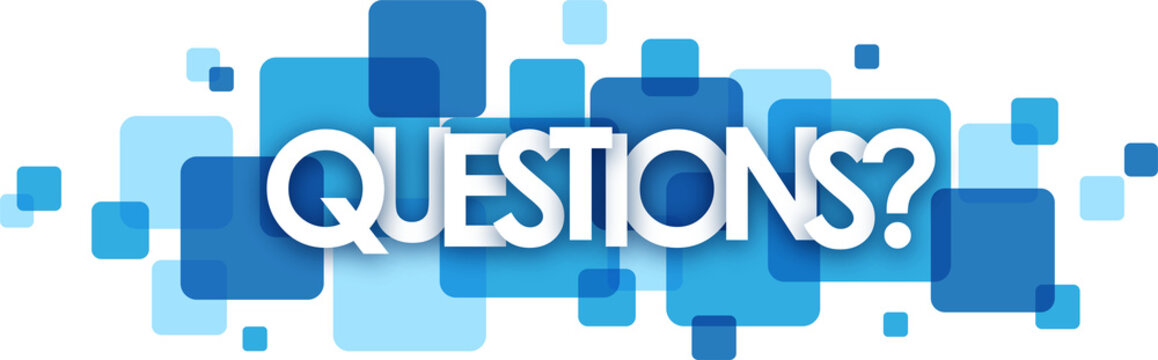

In [112]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\Basic Quesions.jpg", width = 500)

 1. Data Structure and Overview

 

In [113]:
# 2.What is the shape of the dataset (number of rows and columns)?	

df.shape




(197428, 26)

In [114]:
# 3.What are the data types of each column?
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype          
---  ------                        --------------   -----          
 0   market_id                     197428 non-null  float64        
 1   created_at                    197428 non-null  datetime64[ns] 
 2   actual_delivery_time          197428 non-null  datetime64[ns] 
 3   store_id                      197428 non-null  object         
 4   store_primary_category        197428 non-null  object         
 5   order_protocol                197428 non-null  float64        
 6   total_items                   197428 non-null  int64          
 7   subtotal                      197428 non-null  int64          
 8   num_distinct_items            197428 non-null  int64          
 9   min_item_price                197428 non-null  int64          
 10  max_item_price                197428 non-null  int64          
 11  

In [115]:
#3.Are there any missing values in the dataset? If so, how many and in which columns?

print(df.isnull().sum())

'''
at the intial investigaion some null value were present in oure dataset but we already impute it
at present there no missing values in our dataset.
'''


market_id                       0
created_at                      0
actual_delivery_time            0
store_id                        0
store_primary_category          0
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners          0
total_busy_partners             0
total_outstanding_orders        0
TimeTakenForDelivery            0
TimeTakenForDelivery_Seconds    0
HourOfDay                       0
DayOfWeek                       0
month                           0
week                            0
year                            0
TimeTakenForDelivery_Minutes    0
TimeTakenForDelivery_Hours      0
Delivery_Categories             0
DeliverySpeedPerItem            0
AvgItemPrice                    0
dtype: int64


'\nat the intial investigaion some null value were present in oure dataset but we already impute it\nat present there no missing values in our dataset.\n'

2. Descriptive Statistics

In [116]:
# 1. What are the basic statistical summaries (mean, median, standard deviation) for the numerical features?

df.describe() # By defalult descbre() gives statical summaries of numerical feartures.

market_id                     created_at  \
count  197428.000000                         197428   
mean        2.978949  2015-02-04 22:00:09.537962752   
min         1.000000            2014-10-19 05:24:15   
25%         2.000000            2015-01-29 02:32:42   
50%         3.000000     2015-02-05 03:29:09.500000   
75%         4.000000     2015-02-12 01:39:18.500000   
max         6.000000            2015-02-18 06:00:44   
std         1.524989                            NaN   

                actual_delivery_time  order_protocol    total_items  \
count                         197428   197428.000000  197428.000000   
mean   2015-02-04 22:47:59.840164608        2.882529       3.196391   
min              2015-01-21 15:58:11        1.000000       1.000000   
25%    2015-01-29 03:22:23.750000128        1.000000       2.000000   
50%       2015-02-05 04:40:28.500000        3.000000       3.000000   
75%    2015-02-12 02:25:17.750000128        4.000000       4.000000   
max              2015-02-19 22:45:31        7.000000     411.000000   
std                              NaN        1.503796       2.666546   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  197428.000000       197428.000000   197428.000000   197428.000000   
mean     2682.331402            2.670791      686.218470     1159.588630   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1400.000000            1.000000      299.000000      800.000000   
50%      2200.000000            2.000000      595.000000     1095.000000   
75%      3395.000000            3.000000      949.000000     1395.000000   
max     27100.000000           20.000000    14700.000000    14700.000000   
std      1823.093688            1.630255      522.038648      558.411377   

       total_onshift_partners  ...  TimeTakenForDelivery_Seconds  \
count           197428.000000  ...                 197428.000000   
mean                44.786368  ...                   2749.712873   
min                 -4.000000  ...                    223.000000   
25%                 17.000000  ...                   2091.000000   
50%                 37.000000  ...                   2631.000000   
75%                 65.000000  ...                   3302.000000   
max                171.000000  ...                   5296.000000   
std                 34.518248  ...                    888.545797   

           HourOfDay      DayOfWeek          month      week           year  \
count  197428.000000  197428.000000  197428.000000  197428.0  197428.000000   
mean        8.467213       3.218966       1.653170  5.903712    2014.999995   
min         0.000000       0.000000       1.000000       4.0    2014.000000   
25%         2.000000       1.000000       1.000000       5.0    2015.000000   
50%         3.000000       3.000000       2.000000       6.0    2015.000000   
75%        19.000000       5.000000       2.000000       7.0    2015.000000   
max        23.000000       6.000000      10.000000      42.0    2015.000000   
std         8.658759       2.045789       0.476345  1.216714       0.002251   

       TimeTakenForDelivery_Minutes  TimeTakenForDelivery_Hours  \
count                 197428.000000               197428.000000   
mean                      45.571782                    0.763809   
min                        4.950000                    0.061944   
25%                       34.800000                    0.580833   
50%                       43.733333                    0.730833   
75%                       54.783333                    0.917222   
max                       85.300000                    1.471111   
std                       14.473399                    0.246818   

       DeliverySpeedPerItem   AvgItemPrice  
count         197428.000000  197428.000000  
mean              21.135179     975.322997  
min                0.123885       0.000000  
25%               10.670000     647.666667  
50%               16.725000     895.

In [117]:
# 2. What is the distribution of the categorical variables like store_primary_category and order_protocol?

categorical_df = df.select_dtypes(include = "object")
categorical_df.describe()

store_id store_primary_category
count                             197428                 197428
unique                              6743                     74
top     d43ab110ab2489d6b9b2caa394bf920f               american
freq                                 937                  24159

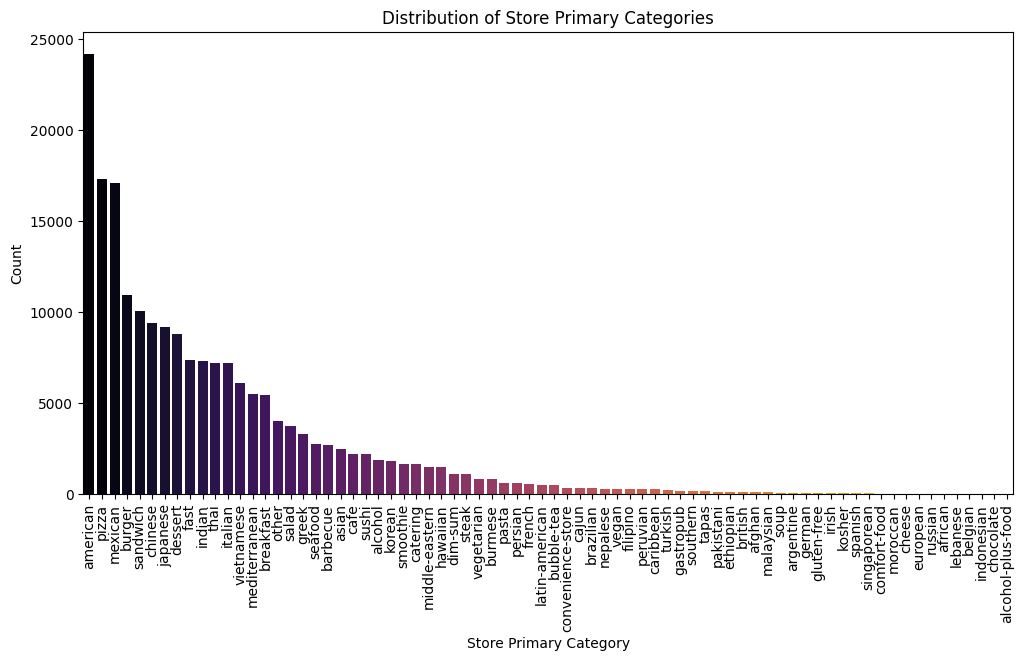

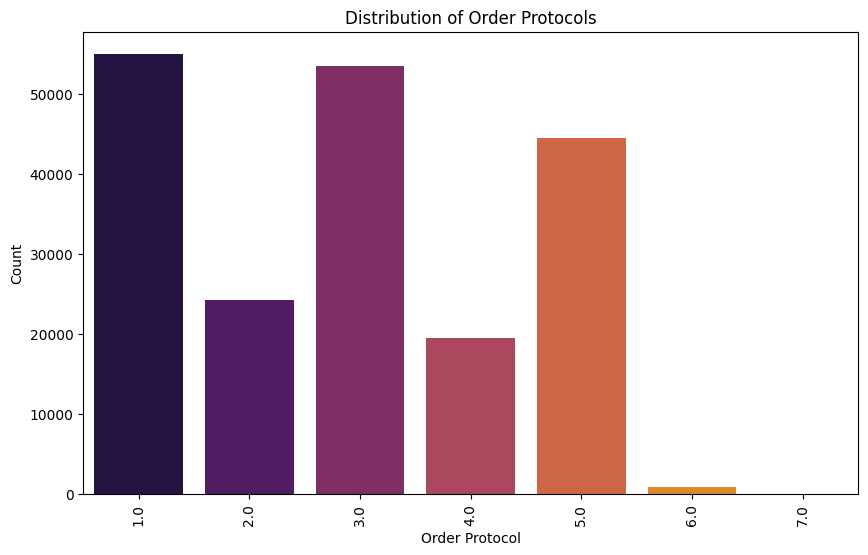

In [118]:
# 2. What is the distribution of the categorical variables like store_primary_category and order_protocol?

store_primary_category_dist = df['store_primary_category'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=store_primary_category_dist.index, y=store_primary_category_dist.values, palette="inferno")
plt.title('Distribution of Store Primary Categories')
plt.xlabel('Store Primary Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


order_protocol_dist = df['order_protocol'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=order_protocol_dist.index, y=order_protocol_dist.values, palette="inferno")
plt.title('Distribution of Order Protocols')
plt.xlabel('Order Protocol')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


                                 3. Datetime Features


In [119]:
# 1. How many orders were placed each day/week/month?
print("Total Order placed in each day :", df["DayOfWeek"].value_counts())
print("="*80)

print("Total Order Placed in each week :", df["week"].value_counts())
print("*"*80)


print("Total Order Placed in each month :", df["month"].value_counts())


Total Order placed in each day : DayOfWeek
5    34541
6    33620
4    27875
0    27403
3    25673
2    24254
1    24062
Name: count, dtype: int64
Total Order Placed in each week : week
7     52042
6     51188
5     45342
4     30864
8     17991
42        1
Name: count, dtype: Int64
********************************************************************************
Total Order Placed in each month : month
2     128945
1      68482
10         1
Name: count, dtype: int64


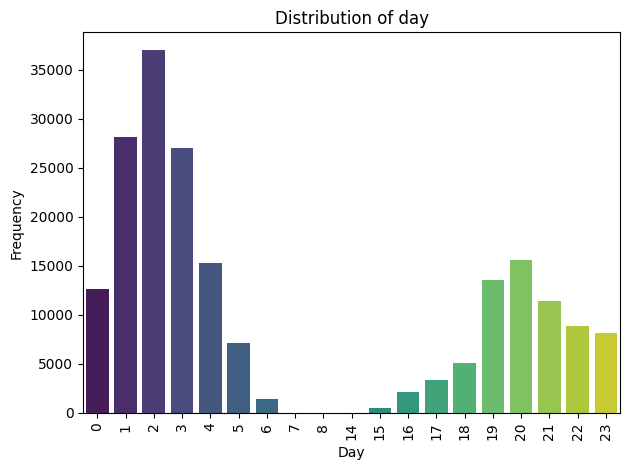

In [120]:
# 2.What is the distribution of order times throughout the day?

HourOfDay_dist = df["HourOfDay"].value_counts().sort_index()
sns.barplot(x = HourOfDay_dist.index, y = HourOfDay_dist.values, palette = "viridis")
plt.title("Distribution of day")
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

                                      4. Feature Engineering

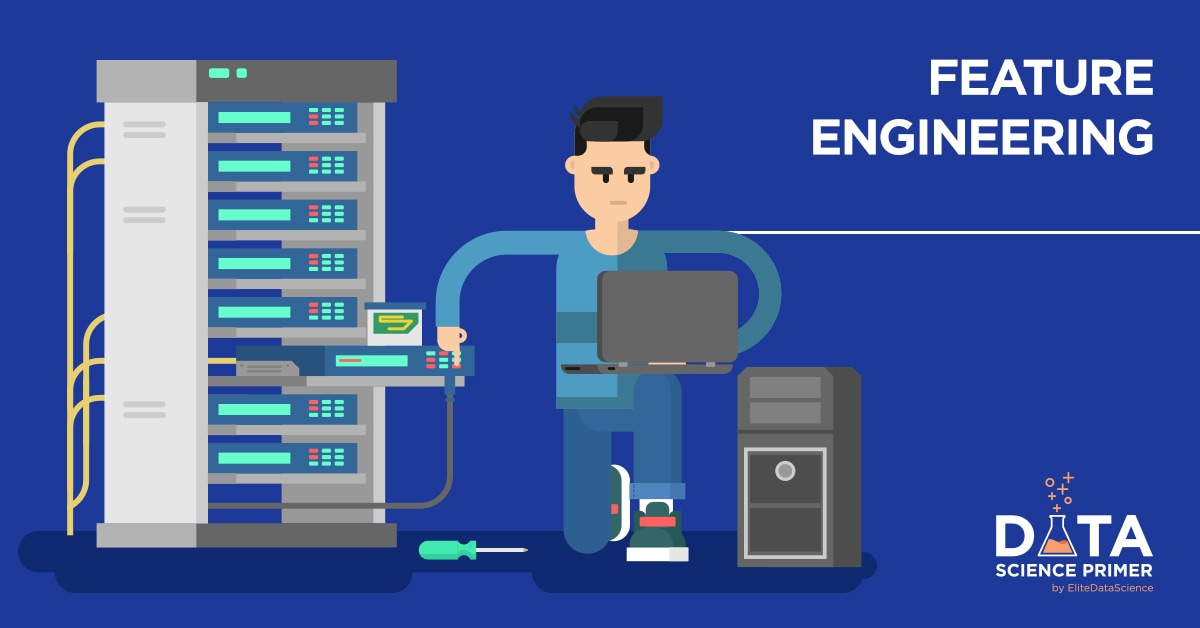

In [121]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\Feature-Engineering-Feature.jpg", width = 500)

In [122]:
# Q1. How can we create a new feature for the time taken for each delivery?

'''Since we alreay created the "TimeTakenForEachDelivery" so don't need to create again.'''

df["DeliverySpeedPerItem"]

0         15.745833
1         67.066667
2         29.683333
3          8.541667
4         13.277778
            ...    
197423    21.705556
197424     9.397222
197425    10.026667
197426    65.116667
197427     9.283333
Name: DeliverySpeedPerItem, Length: 197428, dtype: float64

In [123]:
# Q2. How can we extract additional features from the datetime columns, such as the hour of the day or the day of the week?

'''Since we alreay created the these feature so don't need to it create again.'''

print(df["HourOfDay"])

print("*"*80)

print(df["DayOfWeek"])

0         22
1         21
2         20
3         21
4          2
          ..
197423     0
197424     0
197425     4
197426    18
197427    19
Name: HourOfDay, Length: 197428, dtype: int32
********************************************************************************
0         4
1         1
2         3
3         1
4         6
         ..
197423    1
197424    4
197425    5
197426    6
197427    6
Name: DayOfWeek, Length: 197428, dtype: int32


                                    5. Exploratory Data Analysis (EDA)


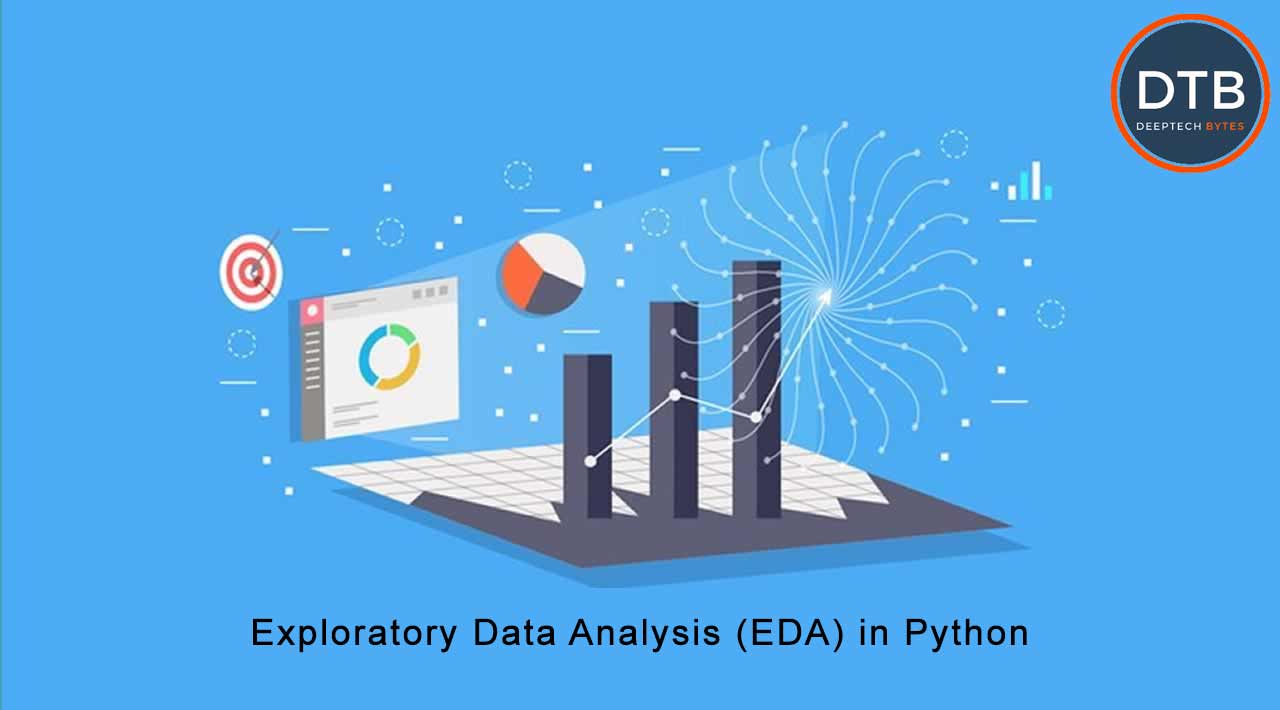

In [124]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\Exploratory-Data-Analysis.jpg", width = 500)

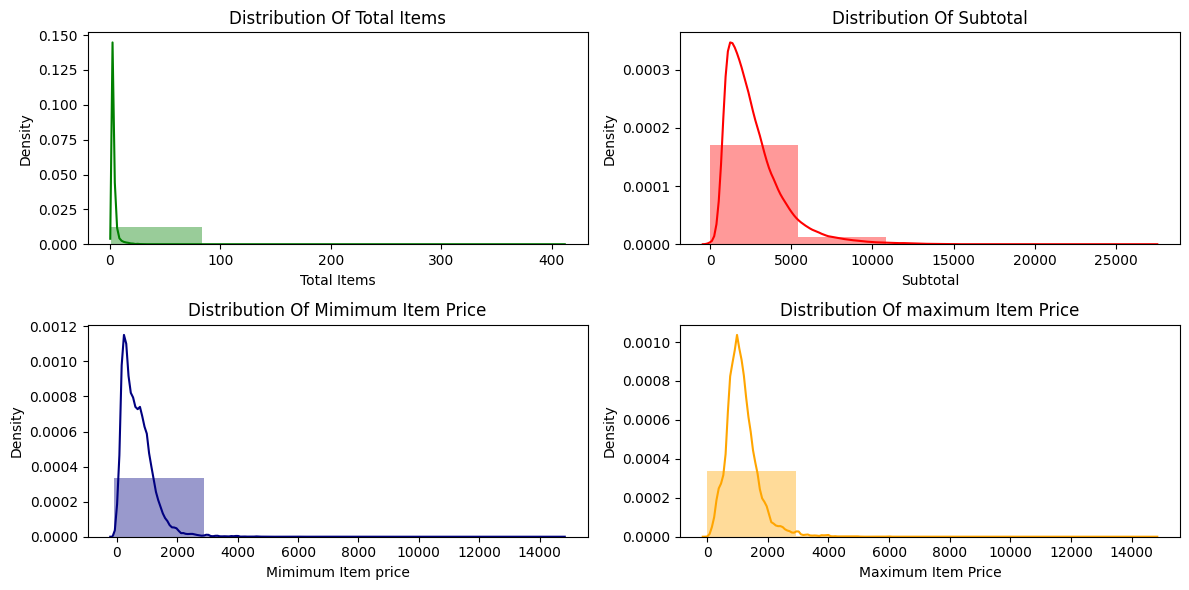

In [125]:
# Q1. What are the distribution plots for continuous variables like total_items, subtotal, min_item_price, and max_item_price? 

fig,axes = plt.subplots(2, 2, figsize = (12, 6))

# Plotting Distibution plot of "total_items"
sns.distplot(x = df["total_items"], ax = axes[0, 0], color = "green", bins = 5)
axes[0, 0].set_title("Distribution Of Total Items")
axes[0, 0].set_xlabel("Total Items")
axes[0, 0].set_ylabel("Density")


# Plotting Distribution plot of "subtotal"
sns.distplot(x = df["subtotal"], ax = axes[0, 1], color = "red", bins = 5)
axes[0, 1].set_title("Distribution Of Subtotal")
axes[0, 1].set_xlabel("Subtotal")
axes[0, 1].set_ylabel("Density")



# Plotting Distribution plot of "mim_item_price"
sns.distplot(x = df["min_item_price"], ax = axes[1, 0], color = "navy", bins = 5)
axes[1, 0].set_title("Distribution Of Mimimum Item Price")
axes[1, 0].set_xlabel("Mimimum Item price")
axes[1, 0].set_ylabel("Density")


 

# Plotting Distribution plot of "max_item_price"
sns.distplot(x = df["max_item_price"], ax = axes[1, 1], color = "orange", bins = 5)
axes[1, 1].set_title("Distribution Of maximum Item Price")
axes[1, 1].set_xlabel("Maximum Item Price")
axes[1, 1].set_ylabel("Density")

 
plt.tight_layout()
plt.show()

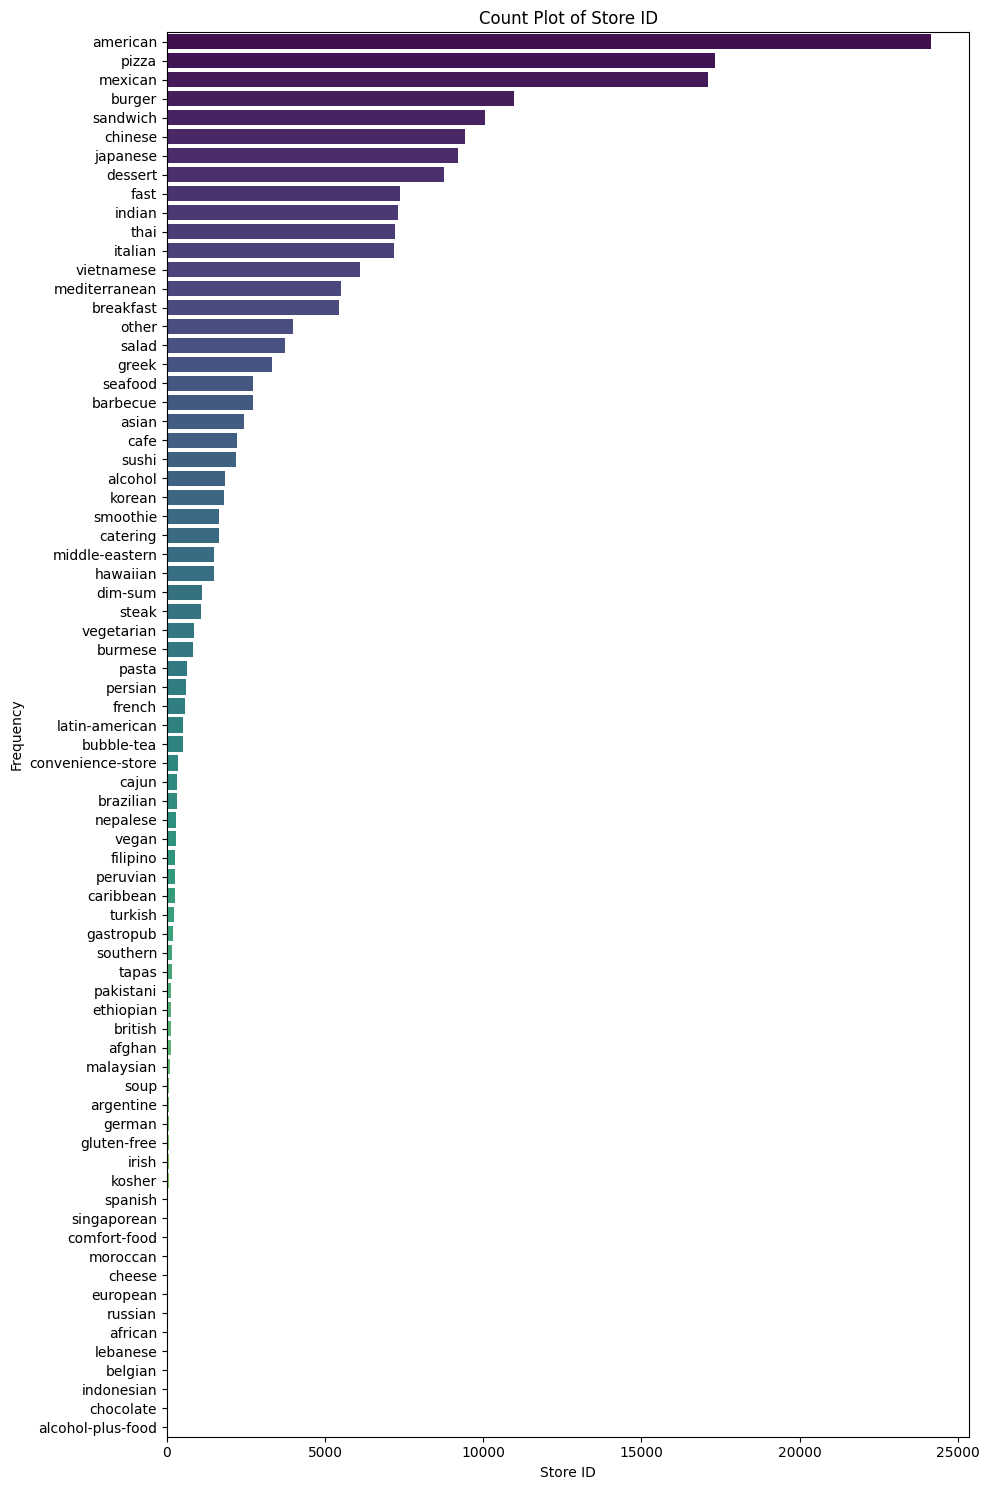

'A CountPlot displays the frequency of each category present in the column, in this column highest frequency of american and \nsecond is pizza and after that it in descending order and last one who has least frequency is alcohol-plu-food.'

In [126]:
# Q.2 What are the count plots for categorical variables like store?

plt.figure(figsize = (10, 15))
sns.countplot(y ="store_primary_category", data = df, order = df["store_primary_category"].value_counts().index, palette = "viridis")
plt.title("Count Plot of Store ID")
plt.xlabel("Store ID")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


'''A CountPlot displays the frequency of each category present in the column, in this column highest frequency of american and 
second is pizza and after that it in descending order and last one who has least frequency is alcohol-plu-food.'''

                                       6.	Missing Values Handling 

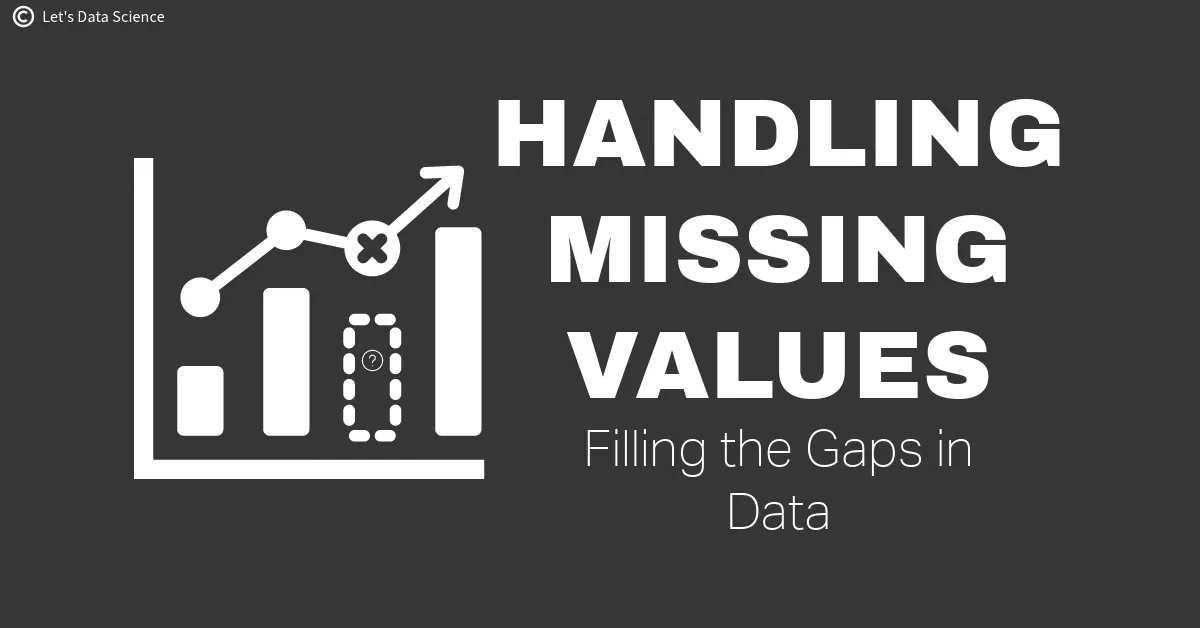

In [127]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\missing values.png", width = 500)

In [128]:
# Q.2 How can we handle missing values in the dataset, especially for important columns like store_primary_category?

print(df["store_primary_category"].isnull().sum())
print(df["store_primary_category"].value_counts())

'''
Since our "store_primary_category" already cleaned not any missing value 
present but suppose in case some missing rows there we can use the mode() 
method bcz as you can see in the columns "american" value has highest frequency 
and other "chocolate","alcohol-plus-food", "indonesian" have the very few counts 
so in that case we can't use mean() bcz mean() is average of data
tha't works with numerical value. if your thinking about ffill()|bfill() 
that's not useful here bcz these are most benficial in the case TimeSeries Dataset.

'''

0
store_primary_category
american             24159
pizza                17321
mexican              17099
burger               10958
sandwich             10060
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: count, Length: 74, dtype: int64


'\nSince our "store_primary_category" already cleaned not any missing value \npresent but suppose in case some missing rows there we can use the mode() \nmethod bcz as you can see in the columns "american" value has highest frequency \nand other "chocolate","alcohol-plus-food", "indonesian" have the very few counts \nso in that case we can\'t use mean() bcz mean() is average of data\ntha\'t works with numerical value. if your thinking about ffill()|bfill() \nthat\'s not useful here bcz these are most benficial in the case TimeSeries Dataset.\n\n'

                                                 7.	Correlation Analysis 

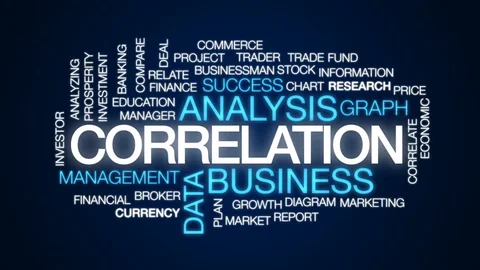

In [129]:
Image(filename= "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\Correlaion.jpg", width = 500)

In [131]:
# Q.1 What are the Pearson and Spearman correlation coefficients between numerical features (e.g., total_items, subtotal, min_item_price, max_item_price)?

numerical_features = df[["total_items", "subtotal", "min_item_price", "max_item_price"]]

# Pearson Correlation
Pearson_corr = numerical_features.corr(method = "pearson")
print(Pearson_corr)

print("\n" + "*"*100, "\n")

# Spearman correlation
Spearman_corr = numerical_features.corr(method = "spearman")
print(Spearman_corr)



'''
Peason Correlation indicates :

1  For highly positive linear releationship.
-1 For highly negative liner releationship.
0  For no linear relationship.


Sperman Correlation indicates : Same as the pearson correlaion but based on rank,
                                 strength and direction of the monotonic relationship between two variables.

''' 

                total_items  subtotal  min_item_price  max_item_price
total_items        1.000000  0.558067       -0.393149       -0.058233
subtotal           0.558067  1.000000        0.037038        0.505547
min_item_price    -0.393149  0.037038        1.000000        0.545484
max_item_price    -0.058233  0.505547        0.545484        1.000000

**************************************************************************************************** 

                total_items  subtotal  min_item_price  max_item_price
total_items        1.000000  0.664301       -0.590844       -0.006598
subtotal           0.664301  1.000000        0.027429        0.592247
min_item_price    -0.590844  0.027429        1.000000        0.429658
max_item_price    -0.006598  0.592247        0.429658        1.000000


'\nPeason Correlation indicates :\n\n1  For highly positive linear releationship.\n-1 For highly negative liner releationship.\n0  For no linear relationship.\n\n\nSperman Correlation indicates : Same as the pearson correlaion but based on rank,\n                                 strength and direction of the monotonic relationship between two variables.\n\n'

In [133]:
# Q.2. What do these correlations suggest?


''' assume result as the matrix we can see that the diagonal elements of the structrue are highly correleated bcz it's correlated
with itself and in other hand 

total_items positively linear correlation with "subtotal" and negative correlation with "min_item_price", "max_item_price" that
means if the "total_items" increases then "subtotal" will increase and "min_item_price", "max_item_price" will decreases and also
vice versa.

'''

 

' assume result as the matrix we can see that the diagonal elements of the structrue are highly correleated bcz it\'s correlated\nwith itself and in other hand \n\ntotal_items positively linear correlation with "subtotal" and negative correlation with "min_item_price", "max_item_price" that\nmeans if the "total_items" increases then "subtotal" will increase and "min_item_price", "max_item_price" will decreases and also\nvice versa.\n\n'

                                      8. Multivariate Analysis


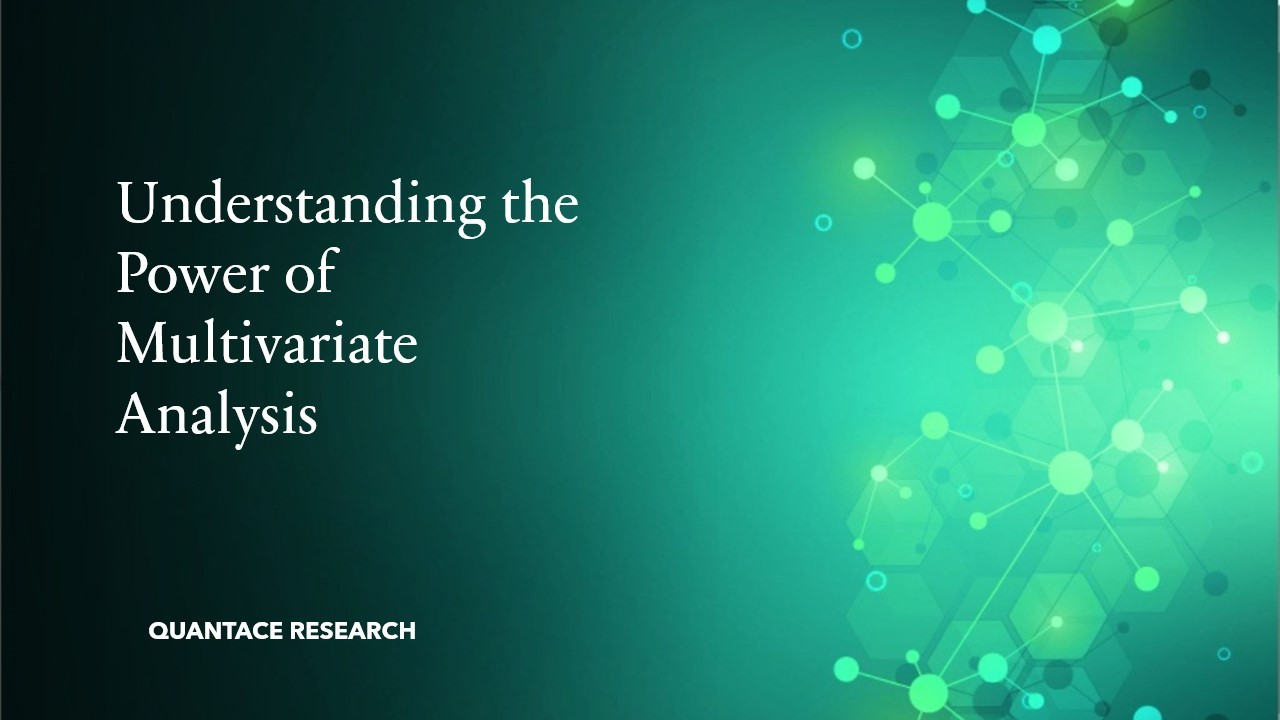

In [134]:
Image(filename  =  "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\multivariate.png", width =500)

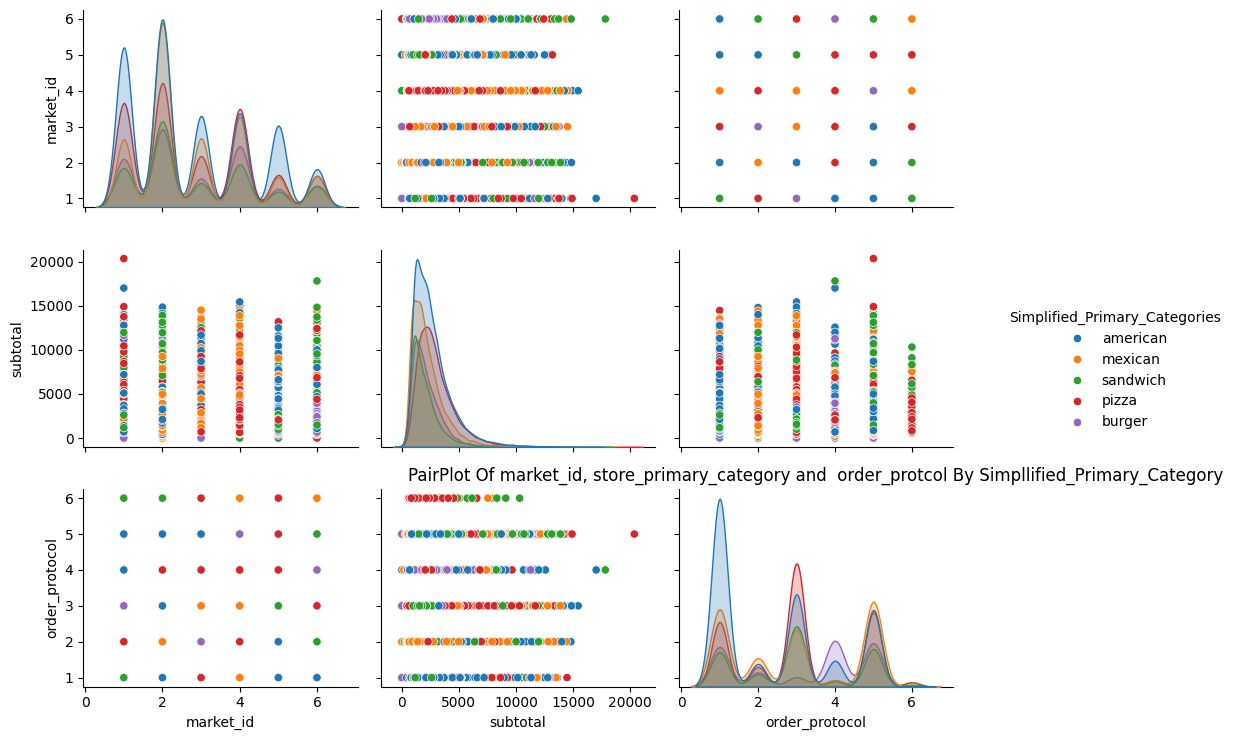

In [135]:
# Q.1 How do multiple factors (e.g., market_id, store_primary_category, order_protocol) together influence the subtotal ?



# Extracting top 5  "store_primary_category" bcz we have 174 unique value might be our plot will cluttered
# for clear picture and avoid clutterness  we only extract top cateogries which have high frquency in our dataset.


# Extracting top 5 "store_primary_category"
Category_Counts = df["store_primary_category"].value_counts()
top5_Categories = Category_Counts.nlargest(5).index

# creating temporary df bcz we don't wanaa change any thing our main df
temp_df = df.copy()


# creating new feature in temporary df
temp_df["Simplified_Primary_Categories"] = temp_df["store_primary_category"].apply(lambda x : x if  x in top5_Categories else np.nan)

# filterd the temp_df bcz we have null values in the temp_df is we don't eliminate it it may be more than our original top 5 categories
filtered_df = temp_df[temp_df["Simplified_Primary_Categories"].notnull()]

# plotting pariplot "market_id", "subtotal", and "order_protocol" with bifarcation of "Simplified_Primary_Categories".
sns.pairplot(filtered_df, vars = ["market_id", "subtotal", "order_protocol"], hue = "Simplified_Primary_Categories")
plt.title("PairPlot Of market_id, store_primary_category and  order_protcol By Simpllified_Primary_Category")
             
plt.tight_layout()
plt.show()




In [136]:
'''
After the observation of "market_id", "subtotal" and "order_protocol" fifarcation of "top5_Categories" 
"market_id" ---> The "market_id" indicates some data poits are concentrated around specific data points
                showing some market has higher orders than others like "market_d" 1 and 2 showing hig density 
                as comparere to other market_id.
                
"subtotal" ----> The "subtotal" indicates most "subtotal" are in the lower side and few are high values.
"order_protocol" ----> The "order_protocol" having distint peak or the randomness indicates order protocol high frequency.


"market_id" VS "subtotal" VS "order_protocol" --->  showing how they are releated to each others 
                                                   "market_id" vs "subtotal" indicates some market has high subtoal but others
                                                   having low, "subtotal" vs "order_protocol" indicates how no one protcols dominating
                                                   means here the randomness and all the things vice-versa and all over dominating "american"
                                                   bcz "american" having has frequency in our dataset.
'''

'\nAfter the observation of "market_id", "subtotal" and "order_protocol" fifarcation of "top5_Categories" \n"market_id" ---> The "market_id" indicates some data poits are concentrated around specific data points\n                showing some market has higher orders than others like "market_d" 1 and 2 showing hig density \n                as comparere to other market_id.\n                \n"subtotal" ----> The "subtotal" indicates most "subtotal" are in the lower side and few are high values.\n"order_protocol" ----> The "order_protocol" having distint peak or the randomness indicates order protocol high frequency.\n\n\n"market_id" VS "subtotal" VS "order_protocol" --->  showing how they are releated to each others \n                                                   "market_id" vs "subtotal" indicates some market has high subtoal but others\n                                                   having low, "subtotal" vs "order_protocol" indicates how no one protcols dominating\n          

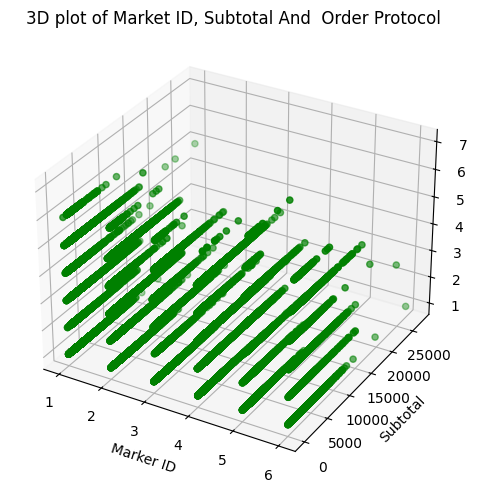

In [137]:
# plotting 3d plot to see how "market_id", "subtotal" and "order_protocol" are releated to each other

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 5))
ax = plt.subplot(111, projection = "3d")

ax.scatter(df["market_id"], df["subtotal"], df["order_protocol"], color = "green", marker = "o")
ax.set_title("3D plot of Market ID, Subtotal And  Order Protocol")
ax.set_xlabel("Marker ID")
ax.set_ylabel("Subtotal")
ax.set_zlabel("Order Protocol")

plt.tight_layout()
plt.show()

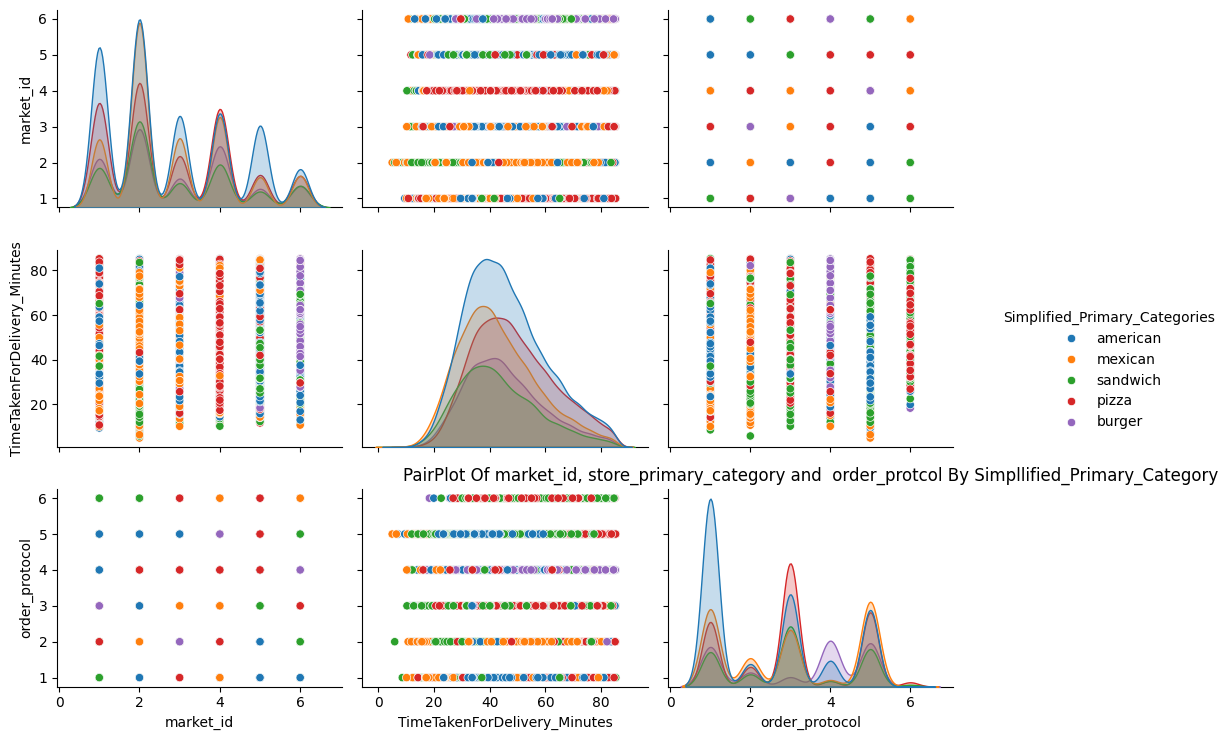

In [138]:
# Q.2 How do multiple factors (e.g., market_id, store_primary_category, order_protocol) together influence the  delivery time?


sns.pairplot(filtered_df, vars = ["market_id", "TimeTakenForDelivery_Minutes", "order_protocol"], hue = "Simplified_Primary_Categories")
plt.title("PairPlot Of market_id, store_primary_category and  order_protcol By Simpllified_Primary_Category")
plt.tight_layout()
plt.show()

In [139]:
'''
After the observation of "market_id", "subtotal" and "order_protocol" fifarcation of "top5_Categories" 
"market_id" ---> The "market_id" indicates some data poits are concentrated around specific data points
                showing some market has higher orders than others like "market_d" 1 and 2 showing hig density 
                as comparere to other market_id..
                
"TimeTakeForDelivery_Minutes" ----> most orders delivers within the 60 minutes but sandwitch delivered so fast and americal likely
                                    late we know that bcz highest frequecy in our dataset so not be surprised.
"order_protocol" ----> The "order_protocol" having distint peak or the randomness indicates order protocol high frequency.


"market_id" VS "subtotal" VS "order_protocol" --->  showing how they are releated to each others 
                                                   and clustered in specific market as well as category.
'''

'\nAfter the observation of "market_id", "subtotal" and "order_protocol" fifarcation of "top5_Categories" \n"market_id" ---> The "market_id" indicates some data poits are concentrated around specific data points\n                showing some market has higher orders than others like "market_d" 1 and 2 showing hig density \n                as comparere to other market_id..\n                \n"TimeTakeForDelivery_Minutes" ----> most orders delivers within the 60 minutes but sandwitch delivered so fast and americal likely\n                                    late we know that bcz highest frequecy in our dataset so not be surprised.\n"order_protocol" ----> The "order_protocol" having distint peak or the randomness indicates order protocol high frequency.\n\n\n"market_id" VS "subtotal" VS "order_protocol" --->  showing how they are releated to each others \n                                                   and clustered in specific market as well as category.\n'

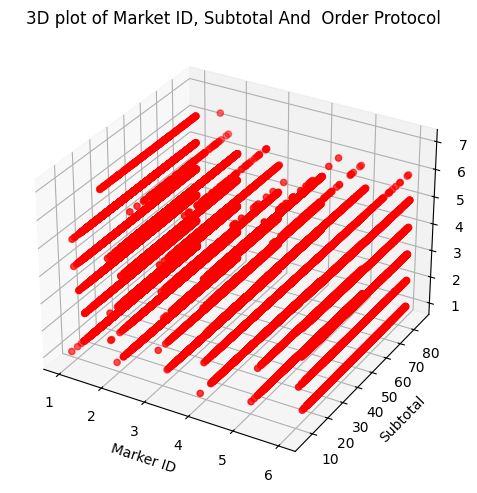

In [140]:
# plotting 3d plot to see how "market_id", "TimeTakenForDelivery_Minutes" and "order_protocol" are releated to each other

fig = plt.figure(figsize = (10, 5))
ax = plt.subplot(111, projection = "3d")

ax.scatter(df["market_id"], df["TimeTakenForDelivery_Minutes"], df["order_protocol"], color = "red", marker = "o")
ax.set_title("3D plot of Market ID, Subtotal And  Order Protocol")
ax.set_xlabel("Marker ID")
ax.set_ylabel("Subtotal")
ax.set_zlabel("Order Protocol")

plt.tight_layout()
plt.show()

                                      9. Outlier Analysis 

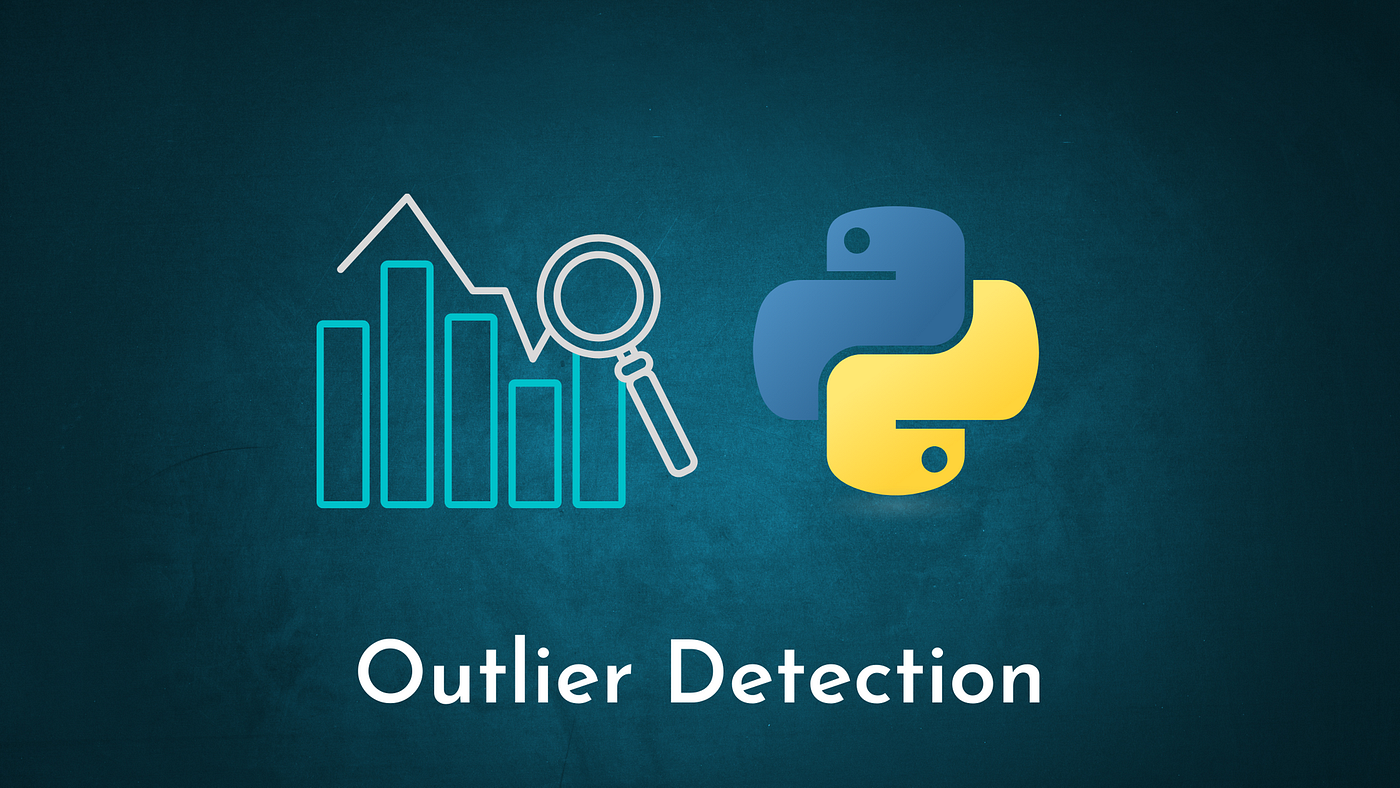

In [141]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\Outlier_Detection.png", width = 500)

In [142]:
#Q. Are there any outliers in the dataset? Which method can be used to identify and handle these outliers?

'''Since we alreaday remove outliers from our dataset but might be possible some outliers still remaning in the dataset.'''

# We used scatterplots, boxplots, and violin plots to detect outliers. After identifying the outliers, we used the 
# IQR (Interquartile Range) method to remove them. The IQR method is generally preferred for skewed data, whereas 
# the Z-score method is typically used for normally distributed data. Therefore, we opted for the IQR method in this case.

df.describe()

'''Here you can see the the some field containing negative values  like "min_item_price" and "total_onshift_partners" 
it is not pratically possible so we can eliminate it and after that our dataset would cleaned.
'''

'Here you can see the the some field containing negative values  like "min_item_price" and "total_onshift_partners" \nit is not pratically possible so we can eliminate it and after that our dataset would cleaned.\n'

In [143]:
# Eliminating negative values from "minimum_item_price" and "total_onshift_partners".

df = df[df["min_item_price"] >= 0]
df = df[df["total_onshift_partners"] >= 0]

In [144]:
'''Here we can see that the no any negative value in our dataset.'''
df.describe()

market_id                     created_at  \
count  197392.000000                         197392   
mean        2.979047  2015-02-04 22:00:25.207181568   
min         1.000000            2014-10-19 05:24:15   
25%         2.000000  2015-01-29 02:32:45.249999872   
50%         3.000000     2015-02-05 03:29:12.500000   
75%         4.000000  2015-02-12 01:39:30.750000128   
max         6.000000            2015-02-18 06:00:44   
std         1.524970                            NaN   

                actual_delivery_time  order_protocol    total_items  \
count                         197392   197392.000000  197392.000000   
mean   2015-02-04 22:48:15.470910720        2.882447       3.195687   
min              2015-01-21 15:58:11        1.000000       1.000000   
25%              2015-01-29 03:22:25        1.000000       2.000000   
50%       2015-02-05 04:40:29.500000        3.000000       3.000000   
75%              2015-02-12 02:25:41        4.000000       4.000000   
max              2015-02-19 22:45:31        7.000000     411.000000   
std                              NaN        1.503806       2.664005   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  197392.000000       197392.000000   197392.000000   197392.000000   
mean     2682.367872            2.670665      686.263030     1159.640583   
min         0.000000            1.000000        0.000000        0.000000   
25%      1400.000000            1.000000      299.000000      800.000000   
50%      2200.000000            2.000000      595.000000     1095.000000   
75%      3395.000000            3.000000      949.000000     1395.000000   
max     27100.000000           20.000000    14700.000000    14700.000000   
std      1823.135191            1.630147      522.026835      558.408781   

       total_onshift_partners  ...  TimeTakenForDelivery_Seconds  \
count           197392.000000  ...                 197392.000000   
mean                44.792205  ...                   2749.668852   
min                  0.000000  ...                    223.000000   
25%                 17.000000  ...                   2091.000000   
50%                 37.000000  ...                   2631.000000   
75%                 65.000000  ...                   3302.000000   
max                171.000000  ...                   5296.000000   
std                 34.517159  ...                    888.541277   

           HourOfDay      DayOfWeek          month      week           year  \
count  197392.000000  197392.000000  197392.000000  197392.0  197392.000000   
mean        8.466387       3.218950       1.653162  5.903745    2014.999995   
min         0.000000       0.000000       1.000000       4.0    2014.000000   
25%         2.000000       1.000000       1.000000       5.0    2015.000000   
50%         3.000000       3.000000       2.000000       6.0    2015.000000   
75%        19.000000       5.000000       2.000000       7.0    2015.000000   
max        23.000000       6.000000      10.000000      42.0    2015.000000   
std         8.658565       2.045751       0.476348  1.216733       0.002251   

       TimeTakenForDelivery_Minutes  TimeTakenForDelivery_Hours  \
count                 197392.000000               197392.000000   
mean                      45.571043                    0.763797   
min                        4.950000                    0.061944   
25%                       34.800000                    0.580833   
50%                       43.733333                    0.730833   
75%                       54.783333                    0.917222   
max                       85.300000                    1.471111   
std                       14.473351                    0.246817   

       DeliverySpeedPerItem   AvgItemPrice  
count         197392.000000  197392.000000  
mean              21.135696     975.358267  
min                0.123885       0.000000  
25%               10.670833     647.794444  
50%               16.725000     895.

                              10.	Correlation Analysis 

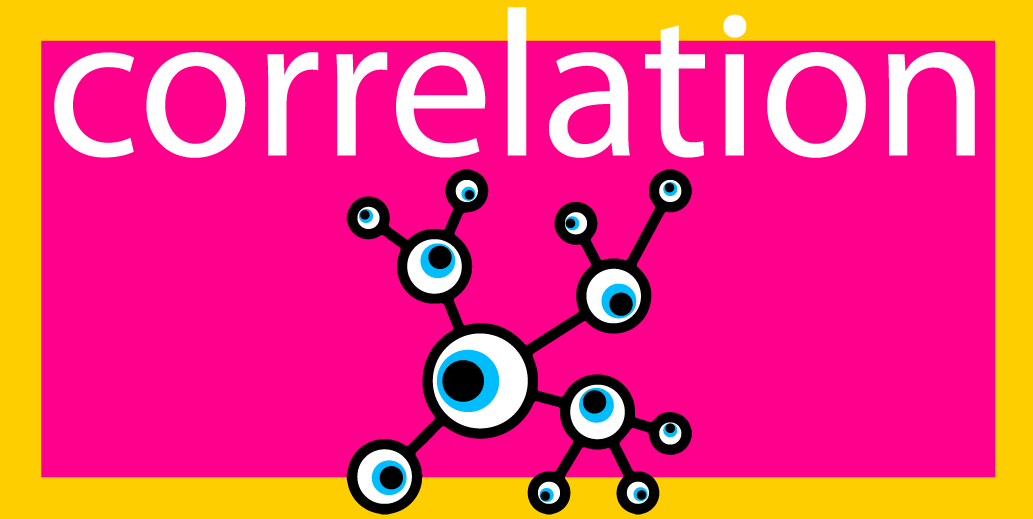

In [145]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\Correlation_2.png", width = 500)

In [148]:
# Q. What are the Pearson and Spearman correlation coefficients between numerical features (e.g., total_items, subtotal, min_item_price, max_item_price)? What do these correlations suggest?


numerical_features = df[["total_items", "subtotal", "min_item_price", "max_item_price"]]

# Pearson Correlation
Pearson_corr = numerical_features.corr(method = "pearson")
print(Pearson_corr)

print("\n" + "*"*100, "\n")

# Spearman correlation
Spearman_corr = numerical_features.corr(method = "spearman")
print(Spearman_corr)



'''
Peason Correlation indicates :

1  For highly positive linear releationship.
-1 For highly negative liner releationship.
0  For no linear relationship.


Sperman Correlation indicates : Same as the pearson correlaion but based on rank,
                                 strength and direction of the monotonic relationship between two variables.

''' 

                total_items  subtotal  min_item_price  max_item_price
total_items        1.000000  0.558709       -0.393210       -0.057952
subtotal           0.558709  1.000000        0.036998        0.505562
min_item_price    -0.393210  0.036998        1.000000        0.545441
max_item_price    -0.057952  0.505562        0.545441        1.000000

**************************************************************************************************** 

                total_items  subtotal  min_item_price  max_item_price
total_items        1.000000  0.664395       -0.590805       -0.006494
subtotal           0.664395  1.000000        0.027404        0.592282
min_item_price    -0.590805  0.027404        1.000000        0.429614
max_item_price    -0.006494  0.592282        0.429614        1.000000


'\nPeason Correlation indicates :\n\n1  For highly positive linear releationship.\n-1 For highly negative liner releationship.\n0  For no linear relationship.\n\n\nSperman Correlation indicates : Same as the pearson correlaion but based on rank,\n                                 strength and direction of the monotonic relationship between two variables.\n\n'

                                              11. Multivariate Analysis


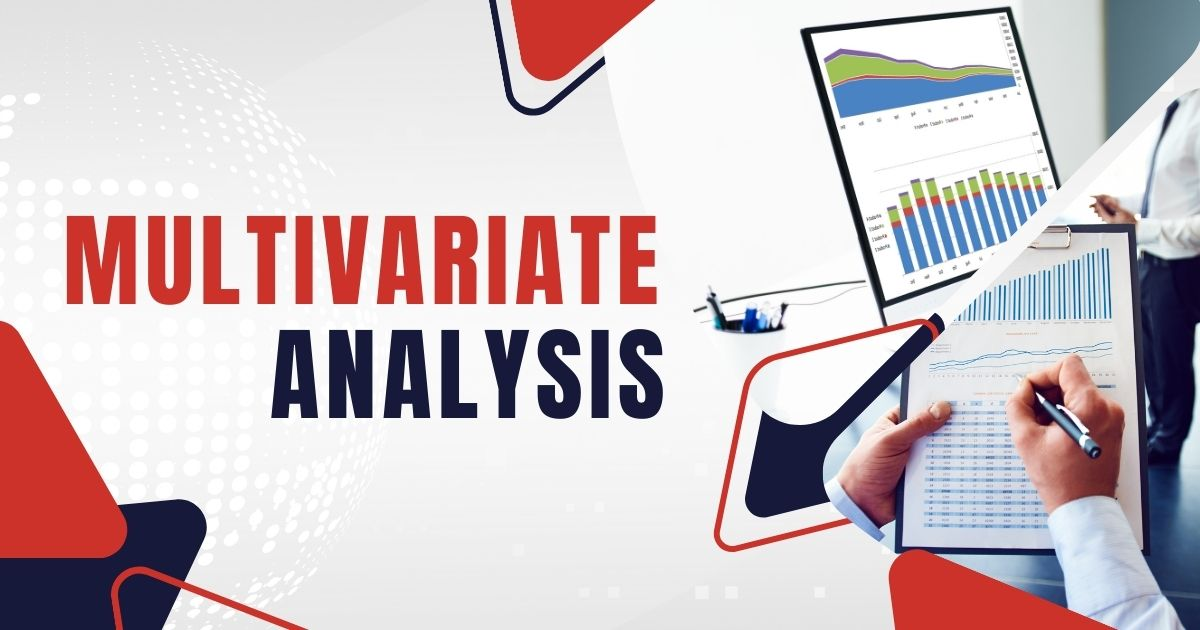

In [149]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\multivariate_2.png", width = 500)

In [150]:
# Q. How do multiple factors (e.g., market_id, store_primary_category, order_protocol) together influence the subtotal or delivery time?

'''Since we've already analyzed this, there's no need to do it again.'''


"Since we've already analyzed this, there's no need to do it again."

                                           12. Outlier Analysis 

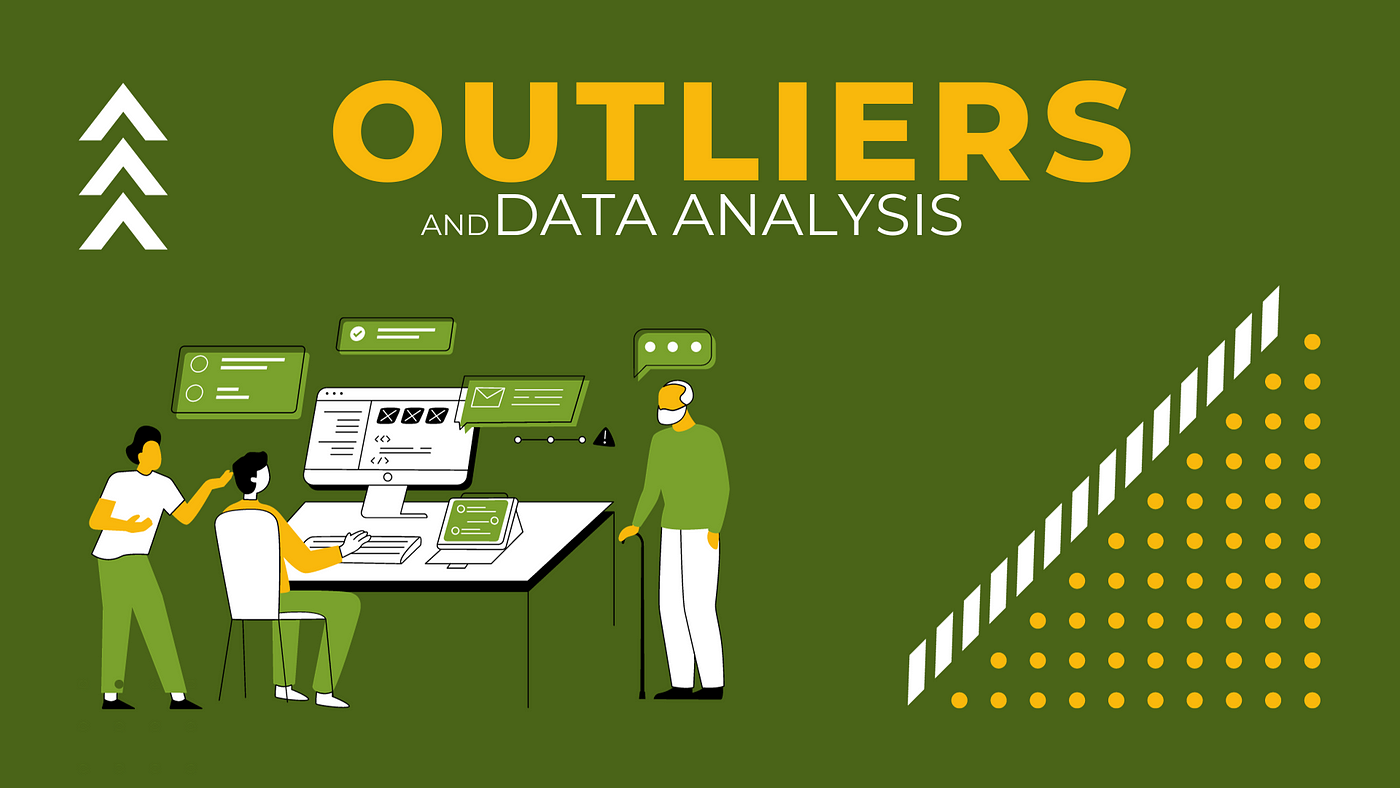

In [151]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\Outlier_Detection_2.png", width = 500)

In [152]:
# Q.  Are there any outliers in the dataset? Which method can be used to identify and handle these outliers? o How do the data distributions change after removing outliers?

'''Since we've already analyzed this, there's no need to do it again.'''


"Since we've already analyzed this, there's no need to do it again."

                               13. Categorical Feature Encoding


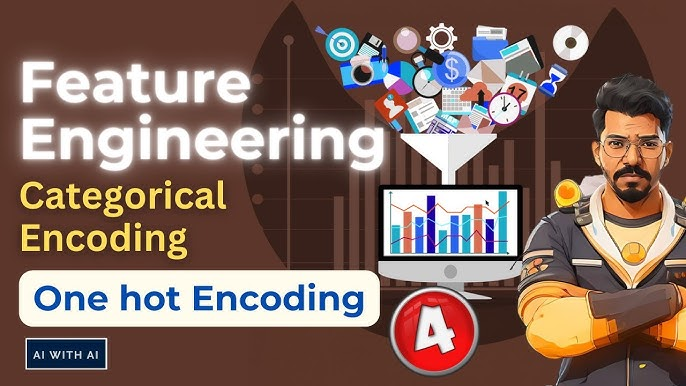

In [153]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\Categorical_Encoding.jpg", width = 500)

In [154]:
#o How can we encode categorical variables like store_primary_category and order_protocol for further analysis?

Categorical_df = df[["store_primary_category", "order_protocol"]]
Encoded_Categorical_df = pd.get_dummies(Categorical_df, drop_first = True)
Encoded_Categorical_df

order_protocol  store_primary_category_african  \
0                  1.0                           False   
1                  2.0                           False   
2                  1.0                           False   
3                  1.0                           False   
4                  1.0                           False   
...                ...                             ...   
197423             4.0                           False   
197424             4.0                           False   
197425             4.0                           False   
197426             1.0                           False   
197427             1.0                           False   

        store_primary_category_alcohol  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                False   
...                                ...   
197423                           False   
197424                           False   
197425                           False   
197426                           False   
197427                           False   

        store_primary_category_alcohol-plus-food  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   
...                                          ...   
197423                                     False   
197424                                     False   
197425                                     False   
197426                                     False   
197427                                     False   

        store_primary_category_american  store_primary_category_argentine  \
0                                  True                             False   
1                                 False                             False   
2                                  True                             False   
3                                  True                             False   
4                                  True                             False   
...                                 ...                               ...   
197423                            False                             False   
197424                            False                             False   
197425                            False                             False   
197426                            False                             False   
197427                            False                             False   

        store_primary_category_asian  store_primary_category_barbecue  \
0                              False                            False   
1                              False                            False   
2                              False                            False   
3                              False                            False   
4                              False                            False   
...                              ...                              ...   
197423                         False                            False   
197424                         False                            False   
197425                         False                            False   
197426                         False                            False   
197427                         False                            False   

        store_primary_category_belgian  store_primary_category_brazilian  ...  \
0                                False                             False  ...   
1                                False                             False  ...   
2                                False                             False  ...   
3                                False                 

                                14.	Advanced Feature Engineering 

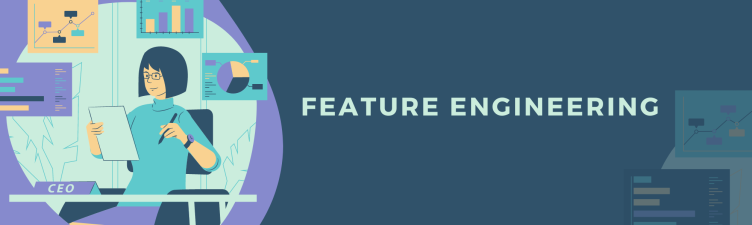

In [155]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\Feature-Engineering-Feature_2.jpg", width = 600)

In [156]:
# Q.1. Can we create a feature based on the availability of delivery partners, such as a ratio of total_busy_partners to total_onshift_partners?

df["AvailabilityOfDeliveryPartners"] = np.where(df["total_onshift_partners"] != 0, # might there is no any "total_onshift_partners" i.e, 0.
                                                   df["total_busy_partners"] / df["total_onshift_partners"], np.nan )
df["AvailabilityOfDeliveryPartners"]

0         0.424242
1         2.000000
2         0.000000
3         1.000000
4         1.000000
            ...   
197423    1.000000
197424    0.916667
197425    1.051282
197426    1.000000
197427    1.000000
Name: AvailabilityOfDeliveryPartners, Length: 197392, dtype: float64

In [157]:
#Q.2. How do engineered features like order time of day or week enhance the predictive power or insights of the analysis?

df["OrderTimeOfDay"] = df["created_at"].dt.time # Created new feature "OrderTimeOfDay"
print(df["OrderTimeOfDay"]) 
print("\n","*"*100, "\n")


print(df["OrderTimeOfDay"].value_counts()) # counting the highest frequecy and which time is peak at the day
print("\n","*"*100, "\n")


'''Since We already created the "DayOfWeek" so don't need to create it again.'''

print(df["DayOfWeek"]) 

print("\n","*"*100, "\n")

print(df["DayOfWeek"].value_counts()) # counting the highest frequecny and which DoyOfWeek at the peak orders


'''
After creating features like 'HourOfDay' and 'DayOfWeek', we can identify peak times during the day and 
which days of the week have the highest activity. Based on this, we will adjust our planning and, if necessary, 
hire additional staff or offer overtime to cover those peak periods.
'''



0         22:24:17
1         21:49:25
2         20:39:28
3         21:21:45
4         02:40:36
            ...   
197423    00:19:41
197424    00:01:59
197425    04:46:08
197426    18:18:15
197427    19:24:33
Name: OrderTimeOfDay, Length: 197392, dtype: object

 **************************************************************************************************** 

OrderTimeOfDay
02:27:40    23
02:12:02    21
02:10:03    21
02:21:13    21
02:17:37    21
            ..
23:20:25     1
16:29:43     1
17:05:03     1
16:38:32     1
17:50:23     1
Name: count, Length: 46074, dtype: int64

 **************************************************************************************************** 

0         4
1         1
2         3
3         1
4         6
         ..
197423    1
197424    4
197425    5
197426    6
197427    6
Name: DayOfWeek, Length: 197392, dtype: int32

 **************************************************************************************************** 

DayOfWeek
5    34534
6   

"\nAfter creating features like 'HourOfDay' and 'DayOfWeek', we can identify peak times during the day and \nwhich days of the week have the highest activity. Based on this, we will adjust our planning and, if necessary, \nhire additional staff or offer overtime to cover those peak periods.\n"

                                        12.	Advanced Visualization 

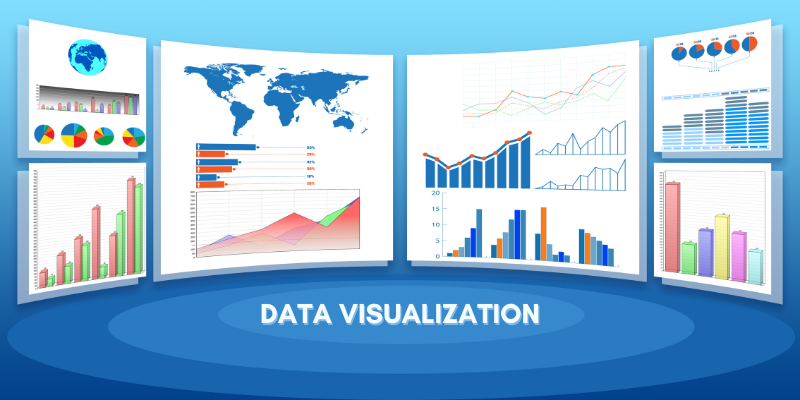

In [158]:
Image(filename = "C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\Data-visualization_.png", width = 500)

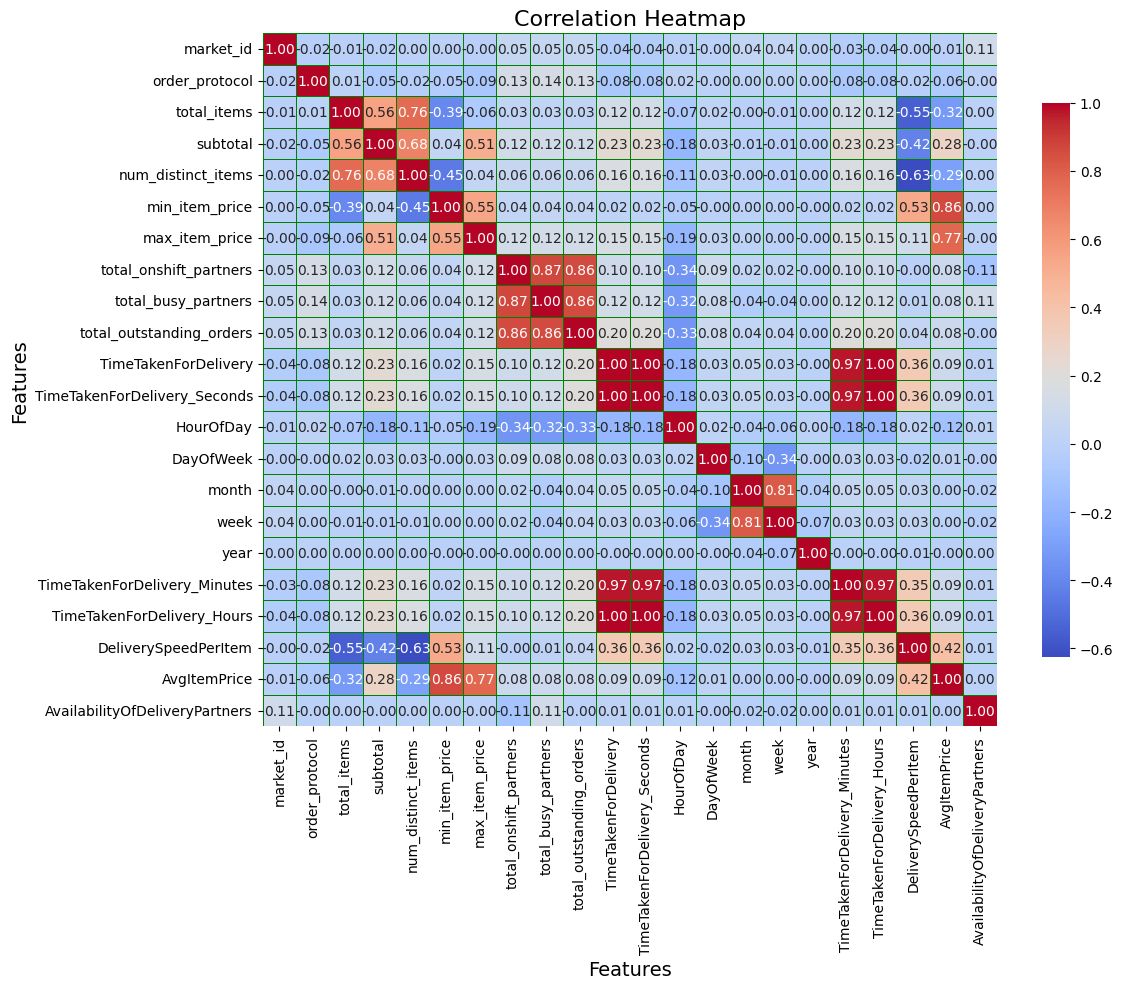

In [159]:
# Q.1. Use advanced visualization techniques (e.g., heatmaps, pair plots) to explore relationships between multiple variables simultaneously.

plt.figure(figsize = (12, 10))
Numerical_df = df.select_dtypes([np.number])
corr = Numerical_df.corr()

sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = "0.2f", 
           linewidth = 0.5, linecolor = "green", cbar_kws = {"shrink" : 0.8}, annot_kws = {"size" : 10})
plt.title("Correlation Heatmap", fontsize = 16)
plt.xlabel("Features", fontsize = 14)
plt.ylabel("Features", fontsize = 14)
plt.tight_layout()
plt.show()

In [160]:
'''
Here we can see that  correlation between all features in the heatmap 
(a). The Darker color represents the feature is highly corelated, lighter color indicates the less corelated to each other 
and white color is indicate the no corelation or the almost neglible corelation between the features.

(b). The highly corelated represents with the positive (1), highly negative corelated represents with the negative (-1) 
and the neglible corelation represents with the (0)
'''

'\nHere we can see that  correlation between all features in the heatmap \n(a). The Darker color represents the feature is highly corelated, lighter color indicates the less corelated to each other \nand white color is indicate the no corelation or the almost neglible corelation between the features.\n\n(b). The highly corelated represents with the positive (1), highly negative corelated represents with the negative (-1) \nand the neglible corelation represents with the (0)\n'

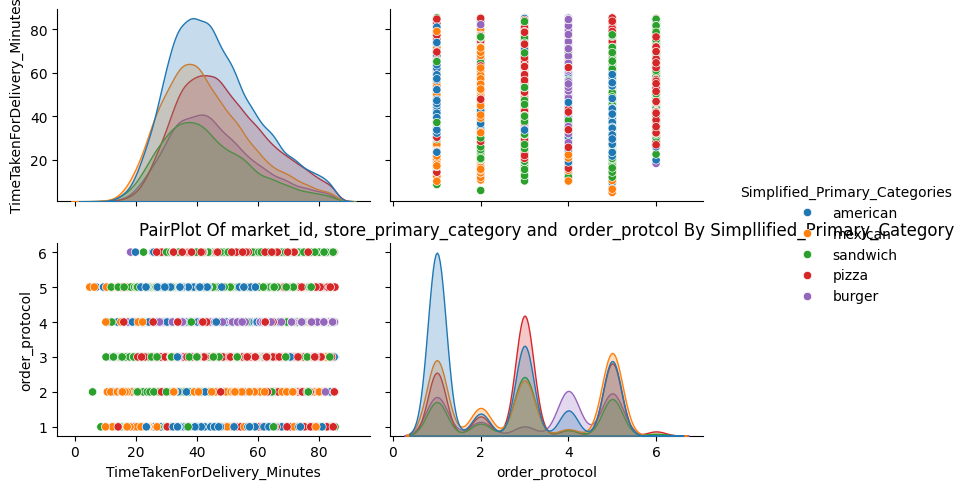

In [161]:
# Q.2.How do interactions between categorical variables (e.g., store_primary_category * order_protocol) affect the delivery time?

sns.pairplot(filtered_df, vars = ["TimeTakenForDelivery_Minutes", "order_protocol"], hue = "Simplified_Primary_Categories")
plt.title("PairPlot Of market_id, store_primary_category and  order_protcol By Simpllified_Primary_Category")
plt.tight_layout()
plt.show()

In [162]:
'''
After the observation of "market_id", "subtotal" and "order_protocol" fifarcation of "top5_Categories" 
                
"TimeTakeForDelivery_Minutes" ----> most orders delivers within the 60 minutes but sandwitch delivered so fast and americal likely
                                    late we know that bcz highest frequecy in our dataset so not be surprised.
"order_protocol" ----> The "order_protocol" having distint peak or the randomness indicates order protocol high frequency.


"TimeTakeForDelivery_Minutes" VS "subtotal" VS "order_protocol" --->  showing how they are releated to each others 
                                                   and clustered in specific market as well as category.
'''

'\nAfter the observation of "market_id", "subtotal" and "order_protocol" fifarcation of "top5_Categories" \n                \n"TimeTakeForDelivery_Minutes" ----> most orders delivers within the 60 minutes but sandwitch delivered so fast and americal likely\n                                    late we know that bcz highest frequecy in our dataset so not be surprised.\n"order_protocol" ----> The "order_protocol" having distint peak or the randomness indicates order protocol high frequency.\n\n\n"TimeTakeForDelivery_Minutes" VS "subtotal" VS "order_protocol" --->  showing how they are releated to each others \n                                                   and clustered in specific market as well as category.\n'

                                             13.	Statistical Tests

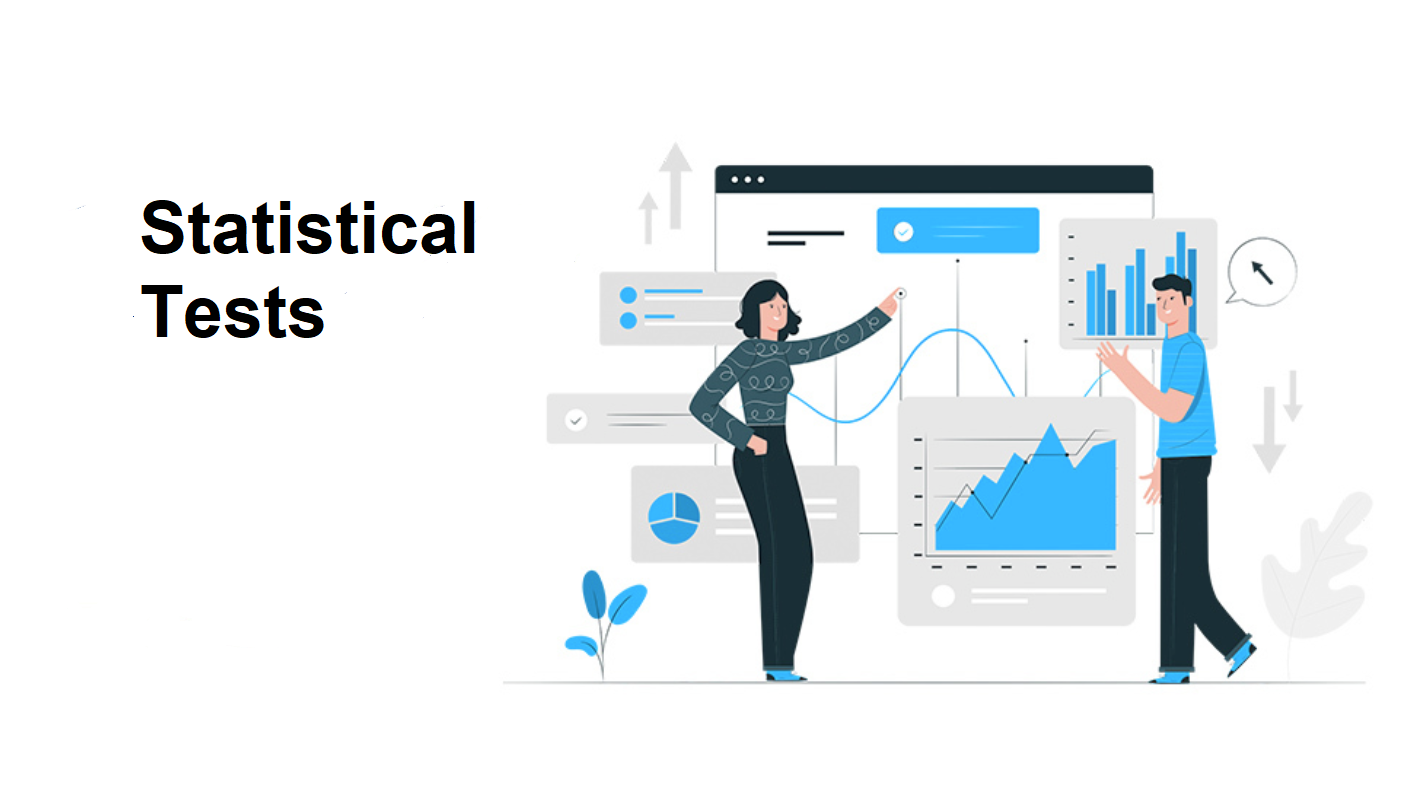

In [163]:
Image(filename ="C:\\Users\\Mustafa Hussain\\Desktop\\PNG\\Statical_Analysis.png", width = 500)

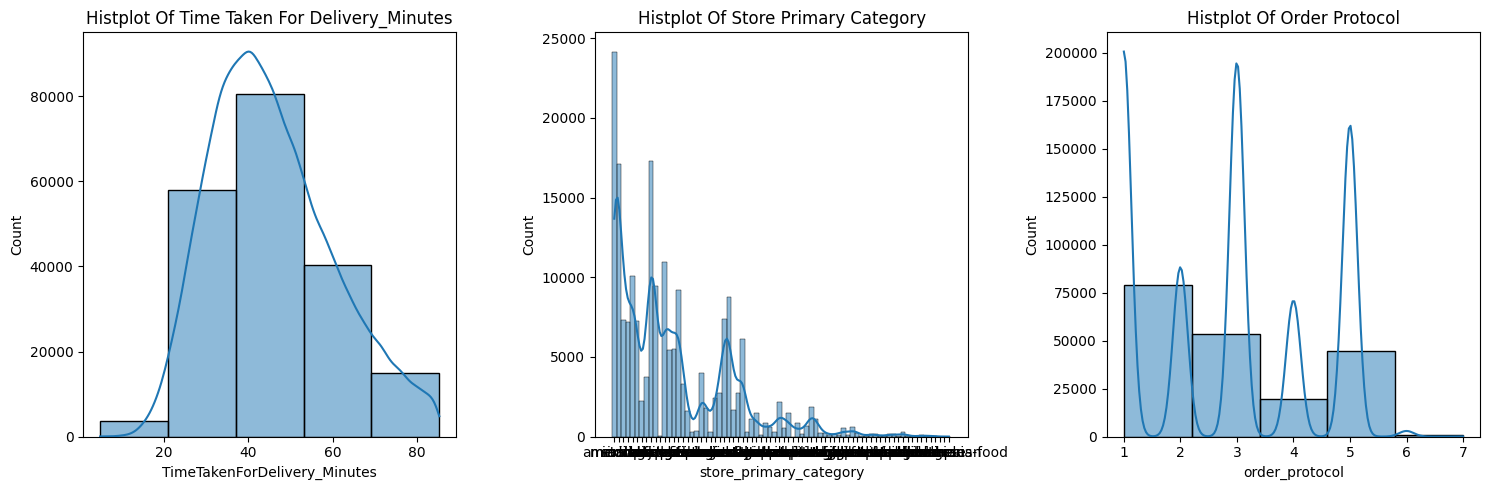

In [164]:
# Trying to find the "TimeTakenForDelivery_Minutes", "store_primary_category" and "order_protocol" are normally distributed or not.

fig, axes  = plt.subplots(1, 3, figsize = (15, 5))

# "TimeTakenForDelivery_Minutes" looks normally distributed it's seems peak around 40 minutes mark and tapers off toward both ends
# Both tails of histogram are releatively balanced which is another of normality.
sns.histplot(x = df["TimeTakenForDelivery_Minutes"], kde = True, bins = 5, ax = axes[0])
axes[0].set_title("Histplot Of Time Taken For Delivery_Minutes")



# "store_primary_category" historgram appear quite irregular and not resemble the normal distribution data contain multiple
# peaks it's shows data are multimodal distribution rather than normal distribution.
sns.histplot(x = df["store_primary_category"], kde = True, bins = 5, ax = axes[1])
axes[1].set_title("Histplot Of Store Primary Category")




# it's also indicate the data is not normally distributed containing multiple distict peak representing multimodal distribution.
sns.histplot(x = df["order_protocol"], kde = True, bins = 5, ax = axes[2])
axes[2].set_title("Histplot Of Order Protocol")

plt.tight_layout()
plt.show()

In [165]:
# "TimeTakenForDelivery_Minutes" might not be normal distribution so we  can confirm it by shapiro test

from scipy.stats import shapiro

stat, p = shapiro(df["TimeTakenForDelivery_Minutes"])
print(f"statics : {stat:.3f},  p-value :{p:.3f}")

if p < 0.05 :
    print("Sample doesn't look normally distruted (reject H0)")
else :
    print("Sample look normally distributed (fail to reject H0)")


'''Now we confirmed it "TimeTakenForDelivery_Minutes" column doesn't normally distributed.'''

statics : 0.978,  p-value :0.000
Sample doesn't look normally distruted (reject H0)


'Now we confirmed it "TimeTakenForDelivery_Minutes" column doesn\'t normally distributed.'

In [166]:
#.Q.1.Perform statistical tests to determine if there are significant differences in delivery times between different groups (e.g., different restaurant categories or order protocols).

'''Since our all three columns aren't normally distributed so we can go with  Kruskal-Wallis test.'''
from scipy.stats import kruskal

# performing test for "store_primary_category"
kruskal_result = kruskal(
    *(df[df["store_primary_category"] == category]["TimeTakenForDelivery_Minutes"]
     for category in df["store_primary_category"].unique())
 )

print(kruskal_result)
print("\n","*"*100,"\n")

if kruskal_result.pvalue  < 0.05 :
    print("sample look normally distributed : (fail to reject H0)")  # something is happeing or difference 
else:
    print("sample doesn't look normally distributed : (reject H0)") # represent no effect or no difference
    
 



'''suppose if we receive "fail ot reject H0" means the there are  differnece between delivery time in "american" category and "burger" category '''

'''suppose if we receive "reject H0" means the there aren't  differnece between delivery time in "american" category and "burger" category '''

KruskalResult(statistic=3974.1393475750597, pvalue=0.0)

 **************************************************************************************************** 

sample look normally distributed : (fail to reject H0)


'suppose if we receive "reject H0" means the there aren\'t  differnece between delivery time in "american" category and "burger" category '

In [167]:
#.Q.2.Perform statistical tests to determine if there are significant differences in delivery times between different groups (e.g., different restaurant categories or order protocols).

#performing test for "order_protocol"
kruskal_result = kruskal(
                    *(df[df["order_protocol"] == category]["TimeTakenForDelivery_Minutes"]
                     for category in df["order_protocol"].unique())
)


print(kruskal_result)
print("\n","*"*100,"\n")

if kruskal_result.pvalue < 0.05 :
    print("Sample look normally distributed : (fail to reject H0)")
else:
    print("Sample doesn't look normally distributed : (reject H0)")
    
    
    
    
    

'''
suppose if we receive "fail ot reject H0" means the there are  differnece between delivery time in "order_protocol :1" and "order_protocol :2" 

suppose if we receive "reject H0" means the there aren't differnece between delivery time in "order_protocol :1" and "order_protocol :2" 

'''


KruskalResult(statistic=1768.814792115734, pvalue=0.0)

 **************************************************************************************************** 

Sample look normally distributed : (fail to reject H0)


'\nsuppose if we receive "fail ot reject H0" means the there are  differnece between delivery time in "order_protocol :1" and "order_protocol :2" \n\nsuppose if we receive "reject H0" means the there aren\'t differnece between delivery time in "order_protocol :1" and "order_protocol :2" \n\n'

In [168]:
'''I have completed all the tasks outlined in the document to the best of my knowledge and expertise. 
If anything was missed or if there are any inaccuracies in the analysis, I welcome your feedback and suggestions for improvement.

I thoroughly enjoyed working on this project, as it allowed me to revisit and apply various concepts.

Thank you, Team CloudML, for creating such an engaging project and giving me the opportunity to work on it.

Sincerely,
A Happy Learner'''



'I have completed all the tasks outlined in the document to the best of my knowledge and expertise. \nIf anything was missed or if there are any inaccuracies in the analysis, I welcome your feedback and suggestions for improvement.\n\nI thoroughly enjoyed working on this project, as it allowed me to revisit and apply various concepts.\n\nThank you, Team CloudML, for creating such an engaging project and giving me the opportunity to work on it.\n\nSincerely,\nA Happy Learner'

In [171]:
import os 
os.getcwd()

'C:\\Users\\Mustafa Hussain\\Placement Test'

In [172]:
os.chdir("C:\\Users\\Mustafa Hussain\\Desktop\\Placement Test")

In [173]:
os.getcwd()

'C:\\Users\\Mustafa Hussain\\Desktop\\Placement Test'

In [ ]:
df.to_csv("Cleaned Porter Dataset.xlsx")


In [176]:
df.to_csv("Cleaned Porter Dataset.csv")


In [179]:
df.to_excel("Cleaned_Porter_Dataset.xlsx", index=False)


ModuleNotFoundError: No module named 'openpyxl'

In [180]:
!pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.9 kB 991.0 kB/s eta 0:00:01
   ------------------- -------------------- 122.9/250.9 kB 1.4 MB/s eta 0:00:01
   --------------------------- ------------ 174.1/250.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [181]:
df.to_excel("Cleaned Porter Dataset.xlsx", index = False)